# Todos
- Dendrograms for the similarity matrix + openings maybe
- Showing clusters with pieces / piece distribution per cluster
- semantic arithmetics

In [11]:
import pandas as pd
import sqlite3
import chess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
sns.set_theme()

# Automatically reload modules when they change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
connection = sqlite3.connect('chess_games.db')
cursor = connection.cursor()

In [13]:
#Extract the dataset
cursor.execute('''SELECT game_id, move, move_number FROM moves
               LIMIT 1000000
               ;''')
moves = cursor.fetchall()
moves_df = pd.DataFrame(moves, columns=['game_id', 'move', 'move_number'])
moves = moves_df.groupby('game_id')['move'].apply(list).to_numpy()
print(moves[:10])
print(f"shape: {moves.shape}")

[list(['d2d4', 'f7f5', 'g2g3', 'g7g6', 'f1g2', 'f8g7', 'g1f3', 'd7d6', 'c2c3', 'e7e6', 'a2a4', 'g8f6', 'd1c2', 'd8e7', 'b1d2', 'e6e5', 'd4e5', 'd6e5', 'e2e4', 'b8c6', 'e1g1', 'f5e4', 'd2e4', 'c8f5', 'f3d2', 'e8c8', 'b2b4', 'g7h6', 'f1e1', 'h6d2', 'c1d2', 'f6e4', 'g2e4', 'e7e6', 'd2g5', 'd8d6', 'a1d1', 'd6d1', 'e1d1', 'h7h6', 'g5e3', 'a7a5', 'c2b1', 'h6h5', 'b4b5', 'c6e7', 'e3g5', 'h8e8', 'h2h4', 'e6c4', 'd1e1', 'f5e4', 'e1e4', 'c4e6', 'g5f4', 'e6f5', 'f4e5', 'e7d5', 'b1e1', 'd5b6', 'f2f4', 'b6d7', 'e1e2', 'b7b6', 'e4e3', 'e8e7', 'e3e4', 'd7c5', 'e4d4', 'e7d7', 'g1g2', 'c8d8', 'g2h2', 'd8c8', 'e2g2', 'c8b8', 'g2a2', 'b8a7', 'a2g2', 'a7b8', 'g2e2', 'b8c8', 'e2f3', 'c8b8', 'f3d1', 'b8c8', 'd1e2', 'c8b8', 'e2d1', 'b8b7', 'd4d7', 'c5d7', 'e5d4', 'd7c5', 'h2g2', 'f5d5', 'g2g1', 'd5f5', 'd4c5', 'f5c5', 'd1d4', 'c5f5', 'd4d2', 'f5b1', 'g1f2', 'b1b3', 'd2d4', 'b3c2', 'f2e3', 'b7c8', 'd4h8', 'c8b7', 'h8d4', 'b7b8', 'd4d8', 'b8b7', 'd8d5', 'b7b8', 'd5g8', 'b8b7', 'g8c4', 'b7b8', 'c4g8', 'b8b7', '

In [14]:
from utils.MovePlotter import MovePlotter

move: d2d4
moveVec: (3, 6) (3, 4)


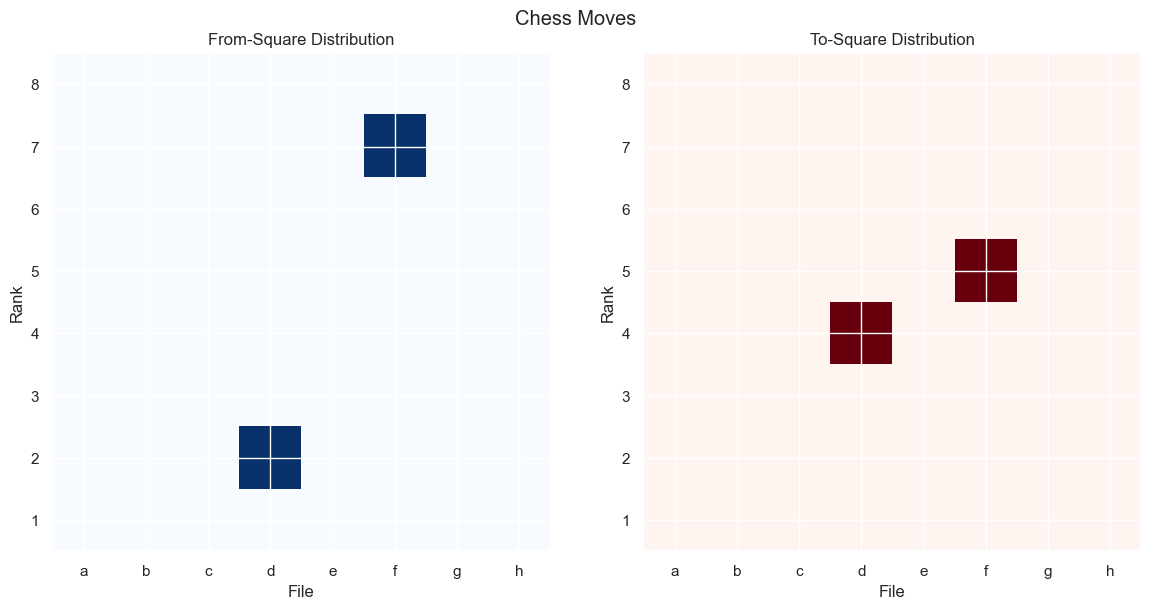

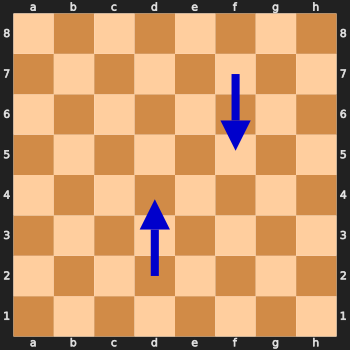

In [15]:
plotter = MovePlotter("Chess Moves")
plotter.addMove(moves[0][0])
plotter.addMove(moves[0][1])
print("move:", moves[0][0])
print("moveVec:", plotter.moveToIndex(moves[0][0][:2]), plotter.moveToIndex(moves[0][0][2:4]))
plotter.plot()

In [16]:
from gensim.models.word2vec import Word2Vec

In [17]:
TRAIN_MODEL = False
if TRAIN_MODEL:
    model = Word2Vec(moves, vector_size=10, min_count=5, window=100, sg=1)
    wordVectors = model.wv.vectors
    
    #Save the model
    model.save("word2vec.model")

In [18]:
#Load the model
model = Word2Vec.load("word2vec.model")

In [19]:
#Print the model dictionary
dictionary = np.array(model.wv.index_to_key)
vectors = model.wv.vectors
print(f'Vectors shape: {vectors.shape}')
vectorsNormalized = vectors / np.linalg.norm(vectors, axis=1, keepdims=True)
startingLetter = [ord(move[3]) for move in dictionary]
print(startingLetter[:10])

Vectors shape: (1829, 10)
[52, 51, 54, 54, 56, 54, 51, 49, 52, 51]


In [20]:
from utils.ChessMoveVisualizer import ChessMoveVisualizer
ChessMoveVisualizer(model, board_size=350, n_similar_moves=10)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01^\x00\x00\x01^\x08\x06\x00\x00\x00\xcd+w\x1a\x00\…

Text(value='', description='Move:', placeholder='e.g., e2e4')

Button(description='Make Move', style=ButtonStyle())

Output()

In [21]:
#Semantic Arithmetic
def semantic_arithmetic(model, word1, word2, word3):
    """
    Perform semantic arithmetic on the given words using the Word2Vec model.
    The operations performed is (word1 - word2) + word3.
    """
    # Get the vectors for the words
    vec1 = model.wv[word1]
    vec2 = model.wv[word2]
    vec3 = model.wv[word3]

    # Perform the arithmetic operation
    result_vector = vec1 - vec2 + vec3

    # Find the most similar word to the result vector
    similar_word = model.wv.similar_by_vector(result_vector, topn=1)[0][0]

    plotter1 = MovePlotter("Move 1")
    plotter1.addMove(word1)

    plotter2 = MovePlotter("Move 2")
    plotter2.addMove(word2)

    plotter3 = MovePlotter("Move 3")
    plotter3.addMove(word3)

    plotter_result = MovePlotter("Result Move")
    plotter_result.addMove(similar_word)

    # Create a button with a larger icon using custom style
    buttonMinus = widgets.Label(
        value='-',
        layout=widgets.Layout(width='60px', height='60px', min_width='60px', min_height='60px', display='flex', justify_content='center', align_items='center'),
        style={'font_size': '64px', 'text_align': 'center'}
    )
    buttonMinus.add_class('fa-3x')  # Add a FontAwesome size class for larger icon

    buttonAdd = widgets.Label(
        value='+',
        layout=widgets.Layout(width='60px', height='60px', min_width='60px', min_height='60px', display='flex', justify_content='center', align_items='center'),
        style={'font_size': '64px', 'text_align': 'center'}
    )
    buttonAdd.add_class('fa-3x')  #

    buttonEqual = widgets.Label(
        value='=',
        layout=widgets.Layout(width='60px', height='60px', min_width='60px', min_height='60px', display='flex', justify_content='center', align_items='center'),
        style={'font_size': '64px', 'text_align': 'center'}
    )
    buttonEqual.add_class('fa-3x')  # Add a FontAwesome size class for larger icon

    horizontalWidget = widgets.HBox(
        [
            plotter1.getBoardWidget(),
            buttonMinus,
            plotter2.getBoardWidget(),
            buttonAdd,
            plotter3.getBoardWidget(),
            buttonEqual,
            plotter_result.getBoardWidget()
        ],
        layout=widgets.Layout(align_items='center')
    )
    display(horizontalWidget)
    return similar_word

# Example usage
result_move = semantic_arithmetic(model, 'a2a3', 'b2b3', 'd2d3')

In [22]:
#Quadruplets
vectors = model.wv.vectors
print(vectors.shape)
# Compute all pairwise vector differences: vectors[i] - vectors[j] for all i, j
vector_diffs = vectors[:, np.newaxis, :] - vectors[np.newaxis, :, :]
print(f"vector_diffs shape: {vector_diffs.shape}")  # (n_vectors, n_vectors, vector_dim)
#Normalize the differences
# vector_diffs_normalized = vector_diffs / np.linalg.norm(vector_diffs, axis=2, keepdims=True)
# print(f"vector_diffs_normalized shape: {vector_diffs_normalized.shape}")  # (n_vectors, n_vectors, vector_dim)


(1829, 10)
vector_diffs shape: (1829, 1829, 10)


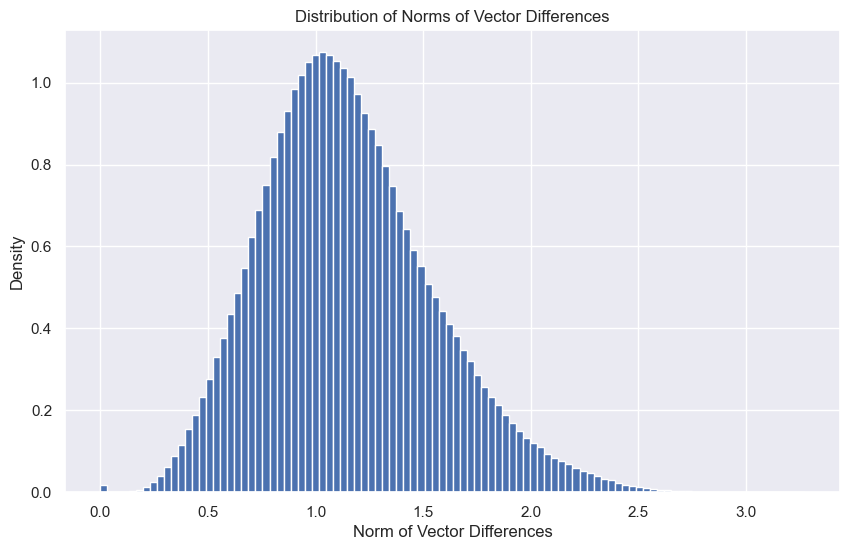

In [39]:
# Plot the distribution of the norms of the differences
plt.figure(figsize=(10, 6))
plt.hist(np.linalg.norm(vector_diffs, axis=2).flatten(), bins=100, density=True)
plt.xlabel('Norm of Vector Differences')
plt.ylabel('Density')
plt.title('Distribution of Norms of Vector Differences')
plt.show()

In [23]:
# Take only the upper triangle (excluding diagonal) for flattening
n = vector_diffs.shape[0]
upper_indices = np.triu_indices(n, k=1)
flattened_diffs = vector_diffs[upper_indices]
print(f"flattened_diffs shape: {flattened_diffs.shape}")  # (n_vectors * n_vectors, vector_dim)
#Filter out the nan
flattened_diffs = flattened_diffs[~np.isnan(flattened_diffs).any(axis=1)]
#Threshold on the norm
norms = np.linalg.norm(flattened_diffs, axis=1)
threshold = 0.1
flattened_diffs = flattened_diffs[norms > threshold]
print(f"flattened_diffs shape after filtering: {flattened_diffs.shape}")  # (n_vectors * n_vectors, vector_dim)

flattened_diffs shape: (1671706, 10)
flattened_diffs shape after filtering: (1671698, 10)


In [51]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_diffs)
print(f"pca_result shape: {pca_result.shape}")  # (n_vectors * n_vectors, 2)

pca_result shape: (1671706, 2)


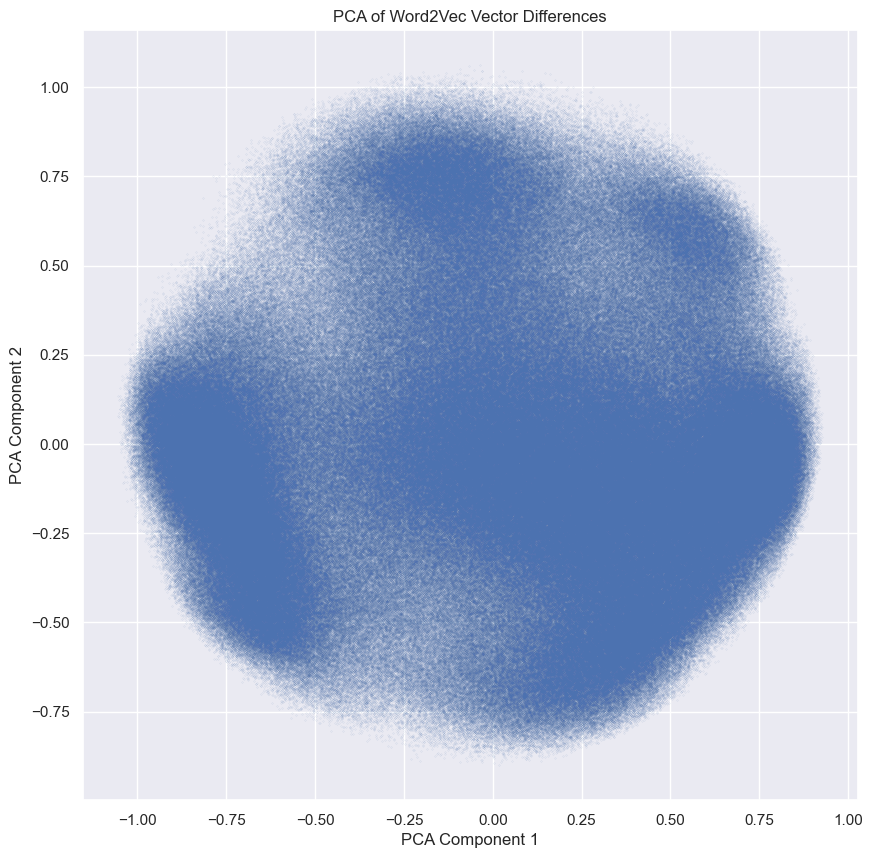

In [52]:
#plot the PCA result
plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, s=.01)
plt.title("PCA of Word2Vec Vector Differences")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [53]:
from scipy.signal import resample

#Resample the vectors to 1000 points
n_points = 10000
resampled_vectors = resample(vectors, n_points, axis=0)
print(f"resampled_vectors shape: {resampled_vectors.shape}")  # (n_points, vector_dim)

#PCA
pca_result_resampled = resample(pca_result, n_points, axis=0)
print(f"pca_result shape: {pca_result_resampled.shape}")  # (n_points, 2)


resampled_vectors shape: (10000, 10)
pca_result shape: (10000, 2)


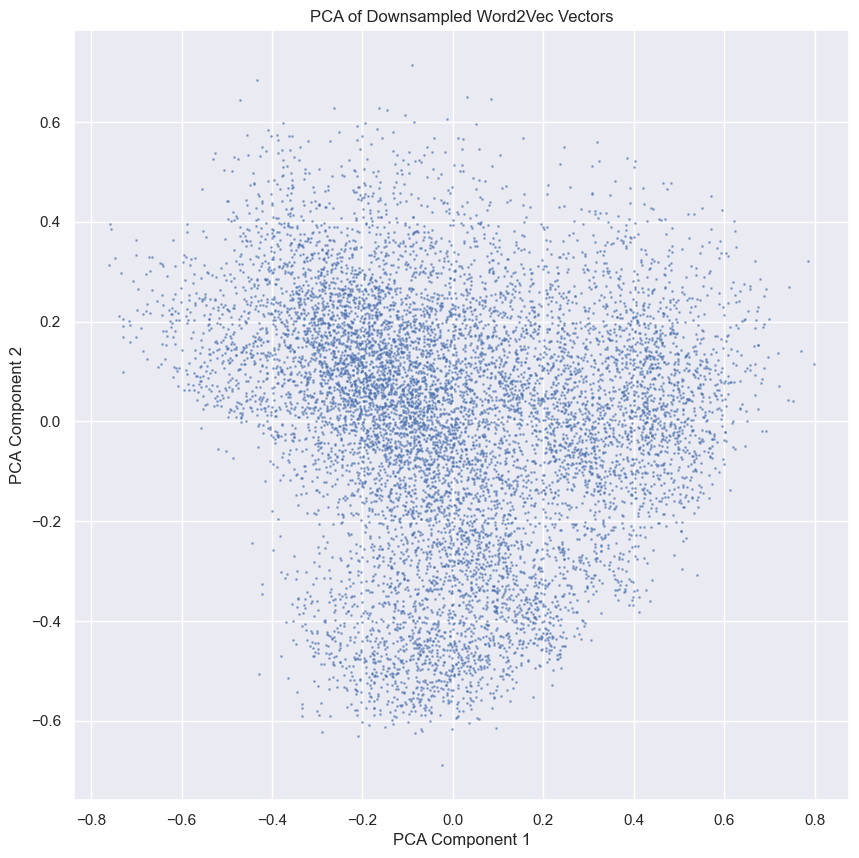

In [54]:
#Plot the downsampled vectors
plt.figure(figsize=(10, 10))
plt.scatter(pca_result_resampled[:, 0], pca_result_resampled[:, 1], alpha=0.5, s=1)
plt.title("PCA of Downsampled Word2Vec Vectors")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

[-1 -1 -1  0  0  0 -1  0 -1  0]
(-1, -1, -1, 0, 0, 0, -1, 0, -1, 0)


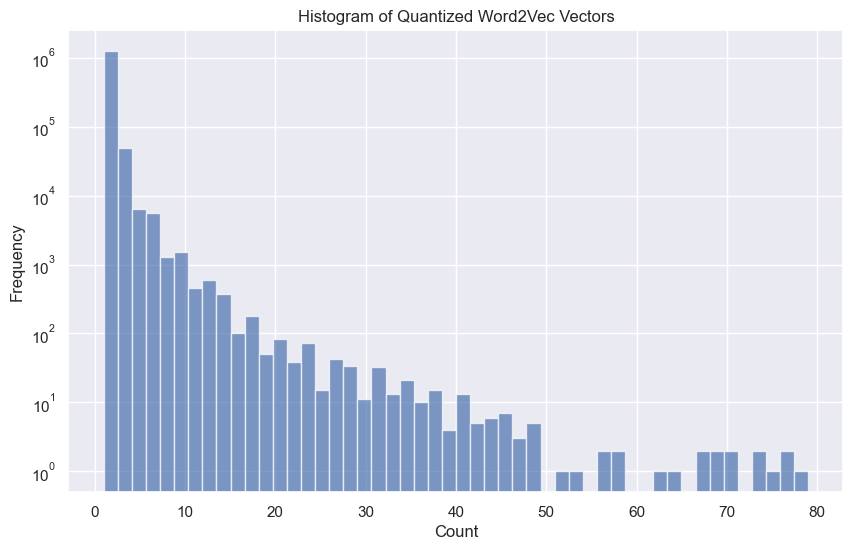

In [30]:
from collections import Counter

# Quantize each dimension into, e.g., 10 bins
n_bins = 5
quantized = np.floor(flattened_diffs * n_bins).astype(int)
print(quantized[0])

# Convert each vector to a tuple (hashable for Counter)
tuples = [tuple(row) for row in quantized]
print(tuples[0])

# Count occurrences
counts = Counter(tuples)
#Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(list(counts.values()), bins=50, alpha=0.7)
plt.title("Histogram of Quantized Word2Vec Vectors")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()

In [31]:
print("Most common quantized vectors:")
for item, count in counts.most_common(10):
    print(f"Count: {count}, Vector: {item}")

Most common quantized vectors:
Count: 79, Vector: (-1, 0, 0, -1, -1, 0, 0, -1, 0, 0)
Count: 76, Vector: (0, 0, 0, -1, -1, 0, -1, -1, 0, 0)
Count: 76, Vector: (0, 0, -1, -1, -1, -1, 0, -1, -1, -1)
Count: 75, Vector: (-1, 0, 0, -1, -1, 0, -1, -1, 0, 0)
Count: 73, Vector: (0, -1, 0, -1, -1, 0, -1, -1, 0, 0)
Count: 73, Vector: (0, -1, -1, -1, -1, -1, -1, -1, -1, -1)
Count: 71, Vector: (-1, -1, 0, -1, -1, 0, 0, -1, 0, 0)
Count: 70, Vector: (0, -1, 0, 0, -1, -1, -1, -1, 0, -1)
Count: 69, Vector: (0, 0, -1, -1, -1, -1, -1, -1, -1, -1)
Count: 69, Vector: (0, -1, 0, -1, -1, 0, -1, -1, 0, -1)


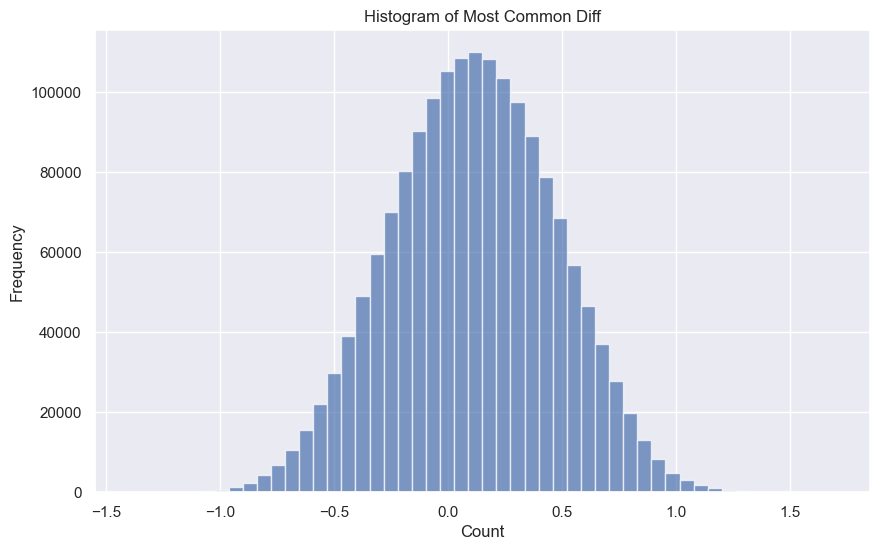

most_common_diff shape: (10,)


array([-0.8868293 ,  0.35742584, -0.19621709,  0.55369323, -2.4083035 ,
        0.8219507 ,  1.5569535 , -0.6503694 , -0.2306625 , -0.29260486],
      dtype=float32)

In [32]:
most_common = np.array(counts.most_common(1)[0][0], dtype=float)
most_common /= np.linalg.norm(most_common)

#Find the most similar diff to the most common
most_common_diff = np.dot(flattened_diffs, most_common)
#Plot the distribution of the most common diff
plt.figure(figsize=(10, 6))
plt.hist(most_common_diff, bins=50, alpha=0.7)
plt.title("Histogram of Most Common Diff")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()
most_common_diff = flattened_diffs[np.argmax(np.abs(most_common_diff))]
print(f"most_common_diff shape: {most_common_diff.shape}")  # (vector_dim,)
most_common_diff

In [40]:
#Semantic Arithmetic
def semantic_arithmetic(model, word1, dir):
    """
    Perform semantic arithmetic on the given words using the Word2Vec model.
    The operations performed is (word1 - word2) + word3.
    """
    # Get the vectors for the words
    vec1 = model.wv[word1]

    vec2 = vec1 + dir
    vec2_similar = model.wv.similar_by_vector(vec2, topn=1)
    print(f"vec2_similar: {vec2_similar} {np.linalg.norm(model.wv[vec2_similar[0][0]] - vec2)}")
    word2 = vec2_similar[0][0]

    vec3 = vec1 - dir
    vec3_similar = model.wv.similar_by_vector(vec3, topn=1)
    print(f"vec3_similar: {vec3_similar} {np.linalg.norm(model.wv[vec3_similar[0][0]] - vec3)}")
    word3 = model.wv.similar_by_vector(vec3, topn=1)[0][0]


    plotter1 = MovePlotter("Move 1")
    plotter1.addMove(word1)

    plotter2 = MovePlotter("Move 2")
    plotter2.addMove(word2)

    plotter3 = MovePlotter("Move 3")
    plotter3.addMove(word3)


    # Create a button with a larger icon using custom style
    buttonMinus = widgets.Label(
        value='-',
        layout=widgets.Layout(width='60px', height='60px', min_width='60px', min_height='60px', display='flex', justify_content='center', align_items='center'),
        style={'font_size': '64px', 'text_align': 'center'}
    )
    buttonMinus.add_class('fa-3x')  # Add a FontAwesome size class for larger icon

    buttonAdd = widgets.Label(
        value='+',
        layout=widgets.Layout(width='60px', height='60px', min_width='60px', min_height='60px', display='flex', justify_content='center', align_items='center'),
        style={'font_size': '64px', 'text_align': 'center'}
    )
    buttonAdd.add_class('fa-3x')  #

    buttonEqual = widgets.Label(
        value='=',
        layout=widgets.Layout(width='60px', height='60px', min_width='60px', min_height='60px', display='flex', justify_content='center', align_items='center'),
        style={'font_size': '64px', 'text_align': 'center'}
    )
    buttonEqual.add_class('fa-3x')  # Add a FontAwesome size class for larger icon

    horizontalWidget = widgets.HBox(
        [
            plotter1.getBoardWidget(),
            buttonAdd,
            plotter2.getBoardWidget(),
            buttonMinus,
            plotter3.getBoardWidget(),
        ],
        layout=widgets.Layout(align_items='center')
    )
    display(horizontalWidget)

# Example usage
result_move = semantic_arithmetic(model, 'c2c3', most_common_diff)

vec2_similar: [('b7a8', 0.948794424533844)] 1.3776960372924805
vec3_similar: [('g7h5', 0.7911552786827087)] 2.402777910232544


In [21]:
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter

# 2. Quantize directions using k-means
n_clusters = 50  # Choose based on desired quantization granularity
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
labels = kmeans.fit_predict(flattened_diffs)

# 3. Count frequencies
freq = Counter(labels)

print(freq)

Counter({14: 141152, 49: 134413, 17: 133000, 9: 131925, 2: 126194, 20: 116556, 31: 114651, 33: 113912, 13: 88052, 26: 83184, 38: 80735, 34: 79667, 10: 76870, 29: 75832, 43: 70147, 42: 69285, 16: 67953, 12: 67156, 4: 66905, 41: 65101, 30: 63782, 46: 62442, 35: 61638, 0: 59502, 1: 58822, 44: 57747, 23: 57393, 18: 56269, 37: 55923, 25: 55770, 11: 52881, 5: 52760, 6: 52676, 27: 52167, 22: 51567, 28: 50105, 24: 49132, 45: 48622, 36: 47432, 7: 45974, 47: 42680, 40: 40002, 19: 36172, 15: 35609, 21: 35370, 48: 34563, 32: 33763, 3: 33701, 8: 32807, 39: 23451})


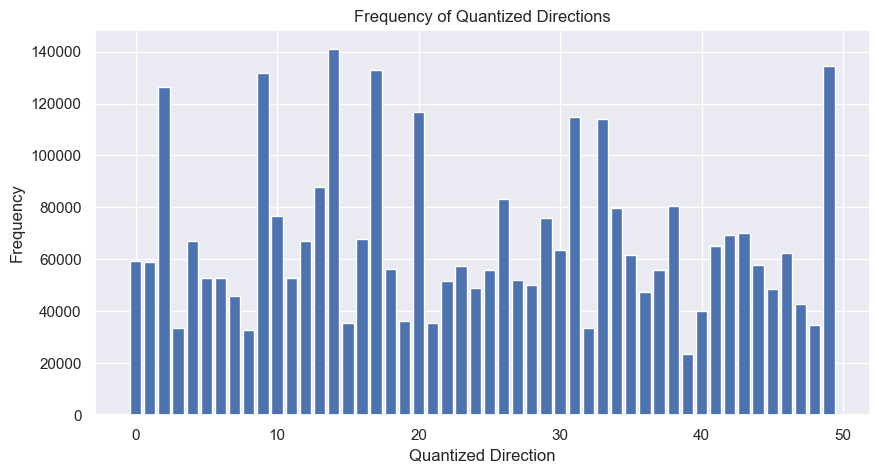

In [22]:
#Plot the frequencies
plt.figure(figsize=(10, 5))
plt.bar(freq.keys(), freq.values())
plt.title("Frequency of Quantized Directions")
plt.xlabel("Quantized Direction")
plt.ylabel("Frequency")
plt.show()

(1829, 1829)


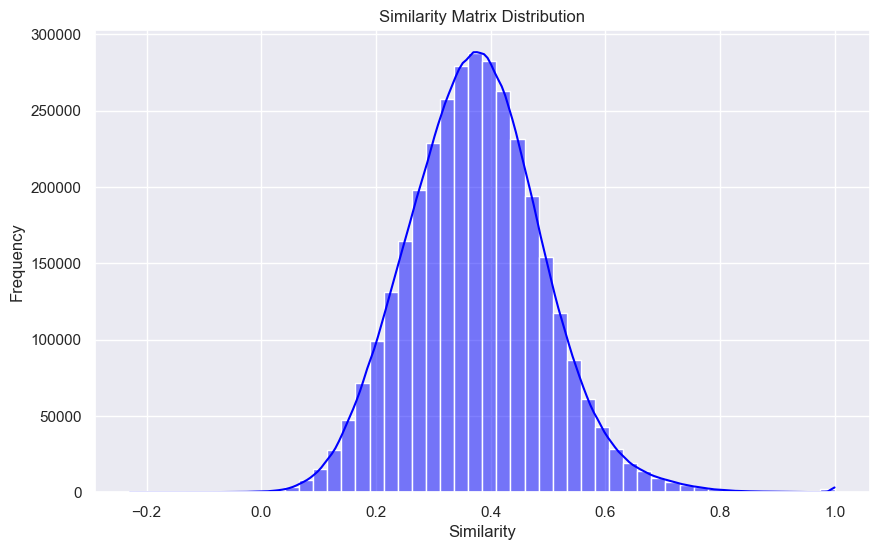

In [ ]:
#Compute the similarity matrix
vectorsSelections = vectorsNormalized
dictionatySelections = dictionary
similarityMatrix = vectorsSelections @ vectorsSelections.T
print(similarityMatrix.shape)

#plot the similarity matrix distribution using sns
plt.figure(figsize=(10, 6))
plt.title('Similarity Matrix Distribution')
sns.histplot(similarityMatrix.flatten(), bins=50, kde=True, color='blue')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.show()

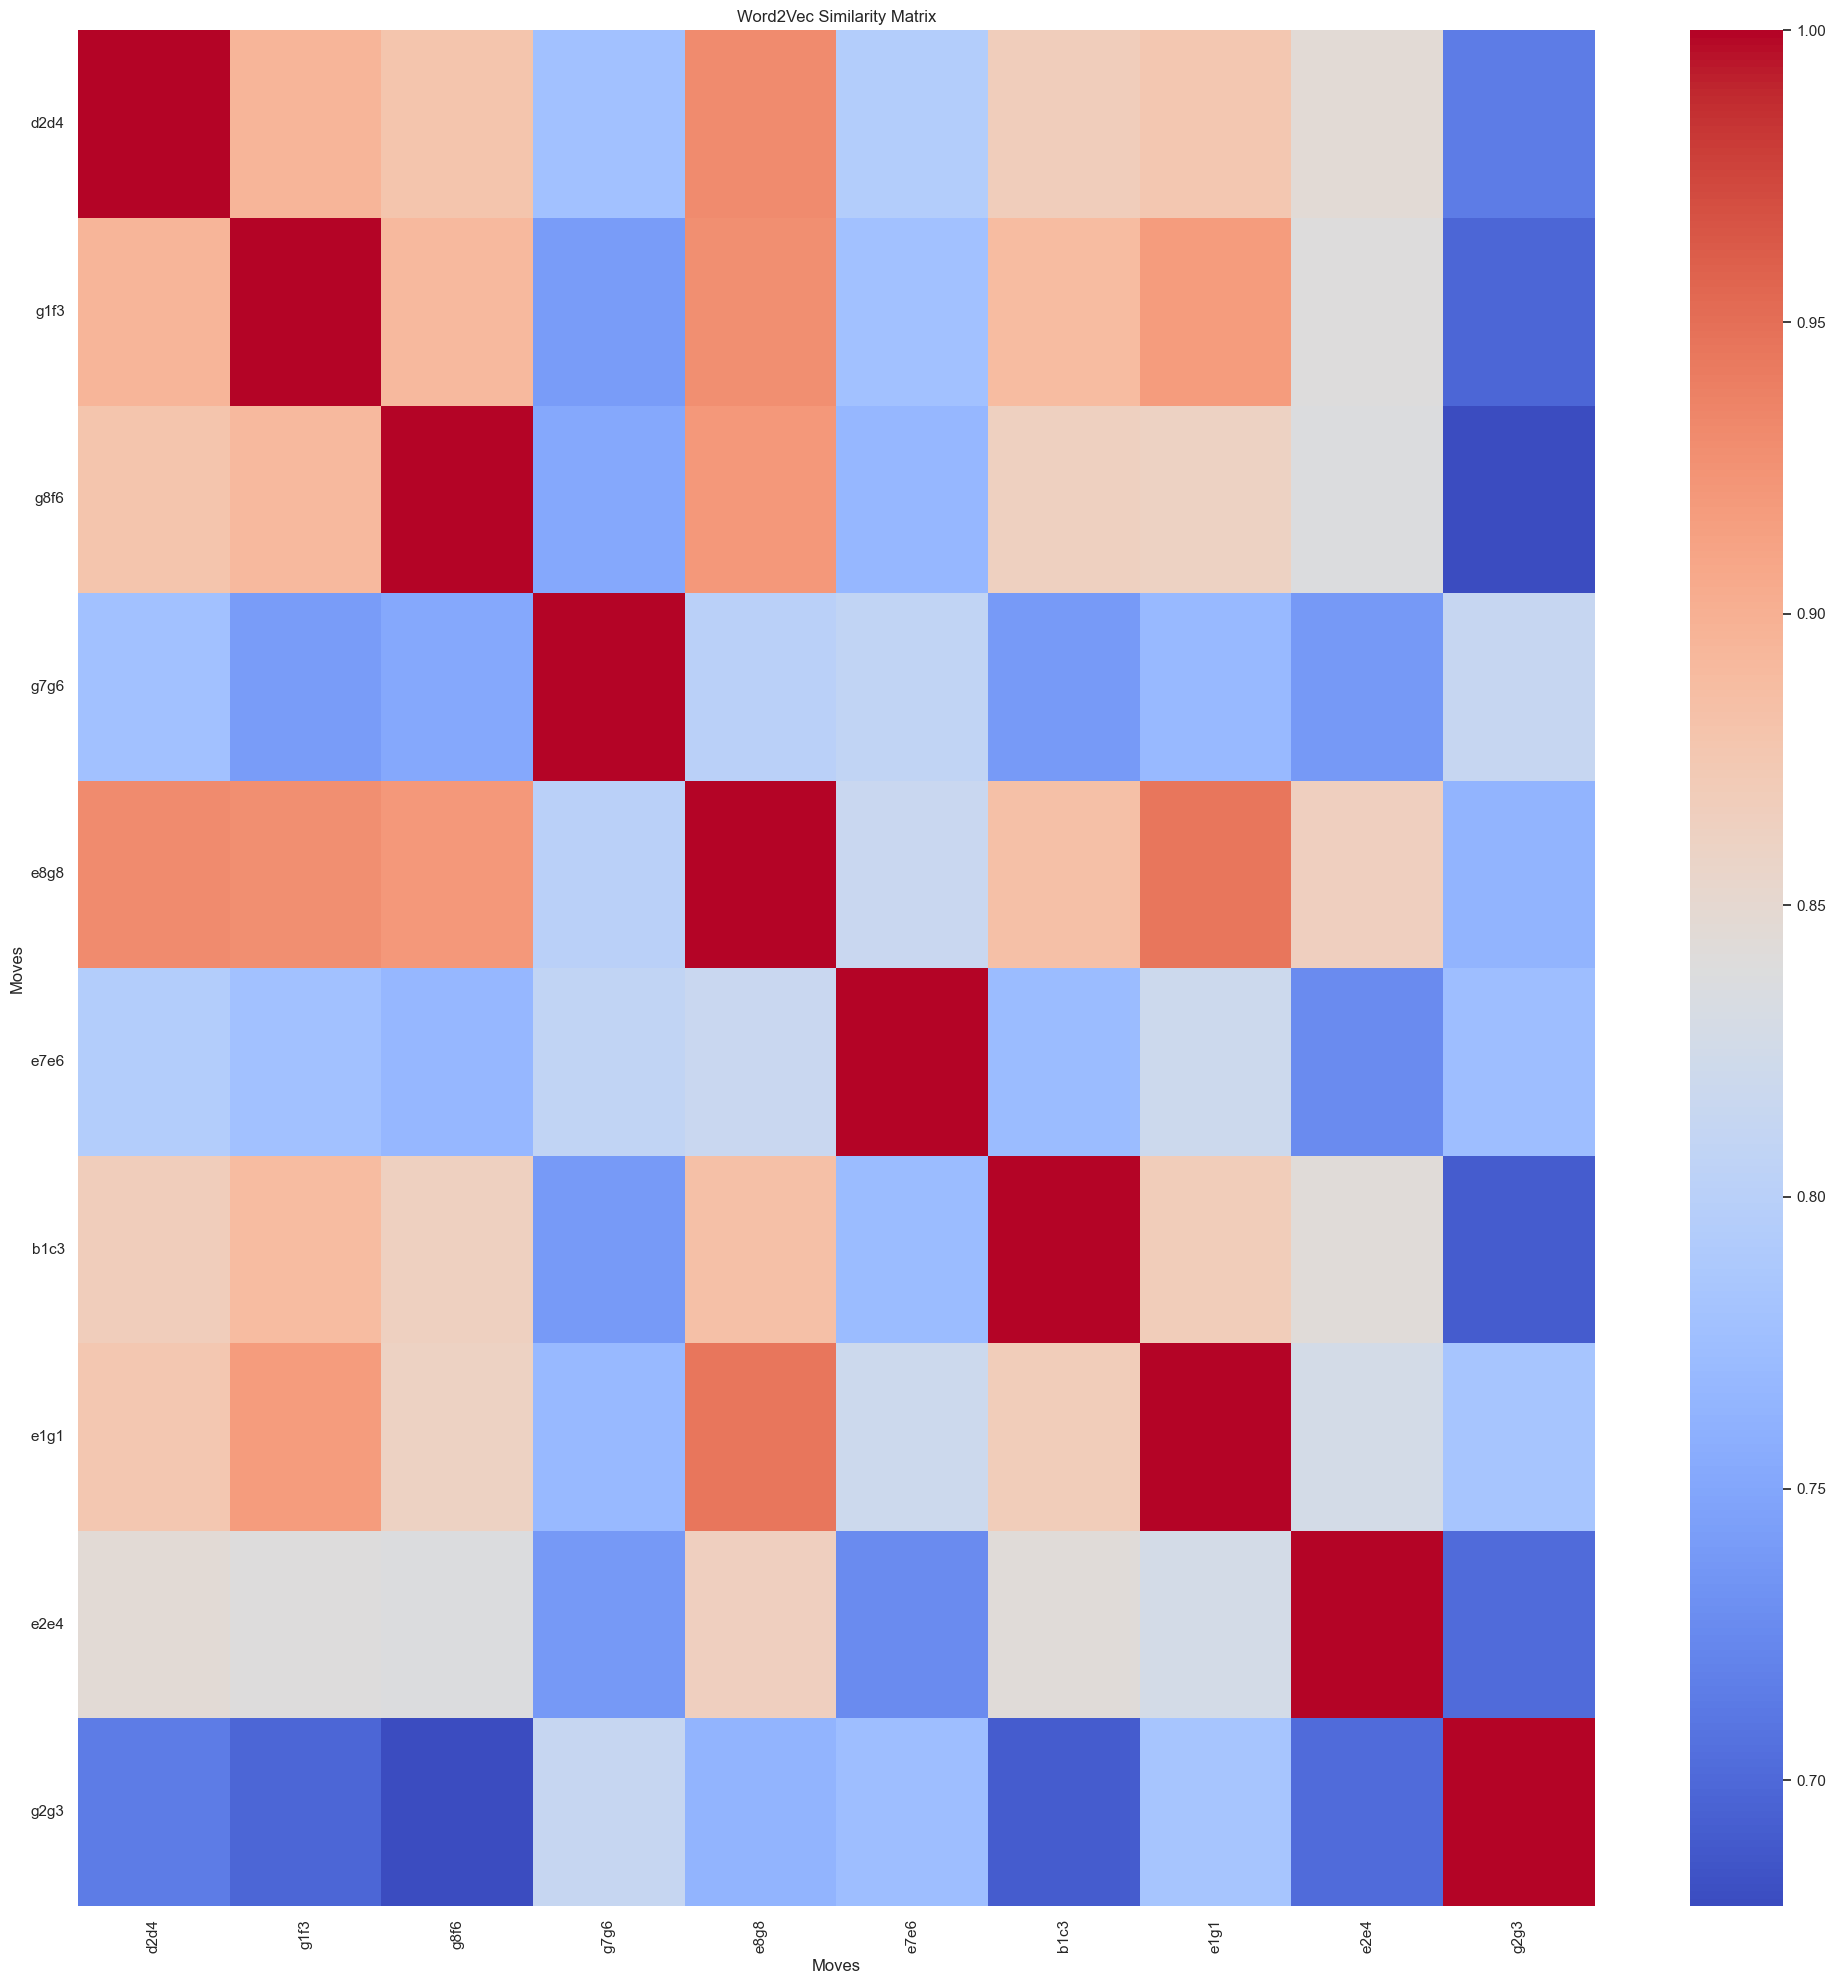

In [12]:
# Plot the similarity matrix using seaborn
nVectors = 10
plt.figure(figsize=(20, 20))
sns.heatmap(similarityMatrix[:nVectors, :nVectors], xticklabels=dictionatySelections[:nVectors],
            yticklabels=dictionatySelections[:nVectors], cmap='coolwarm')
plt.title('Word2Vec Similarity Matrix')
plt.xlabel('Moves')
plt.ylabel('Moves')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

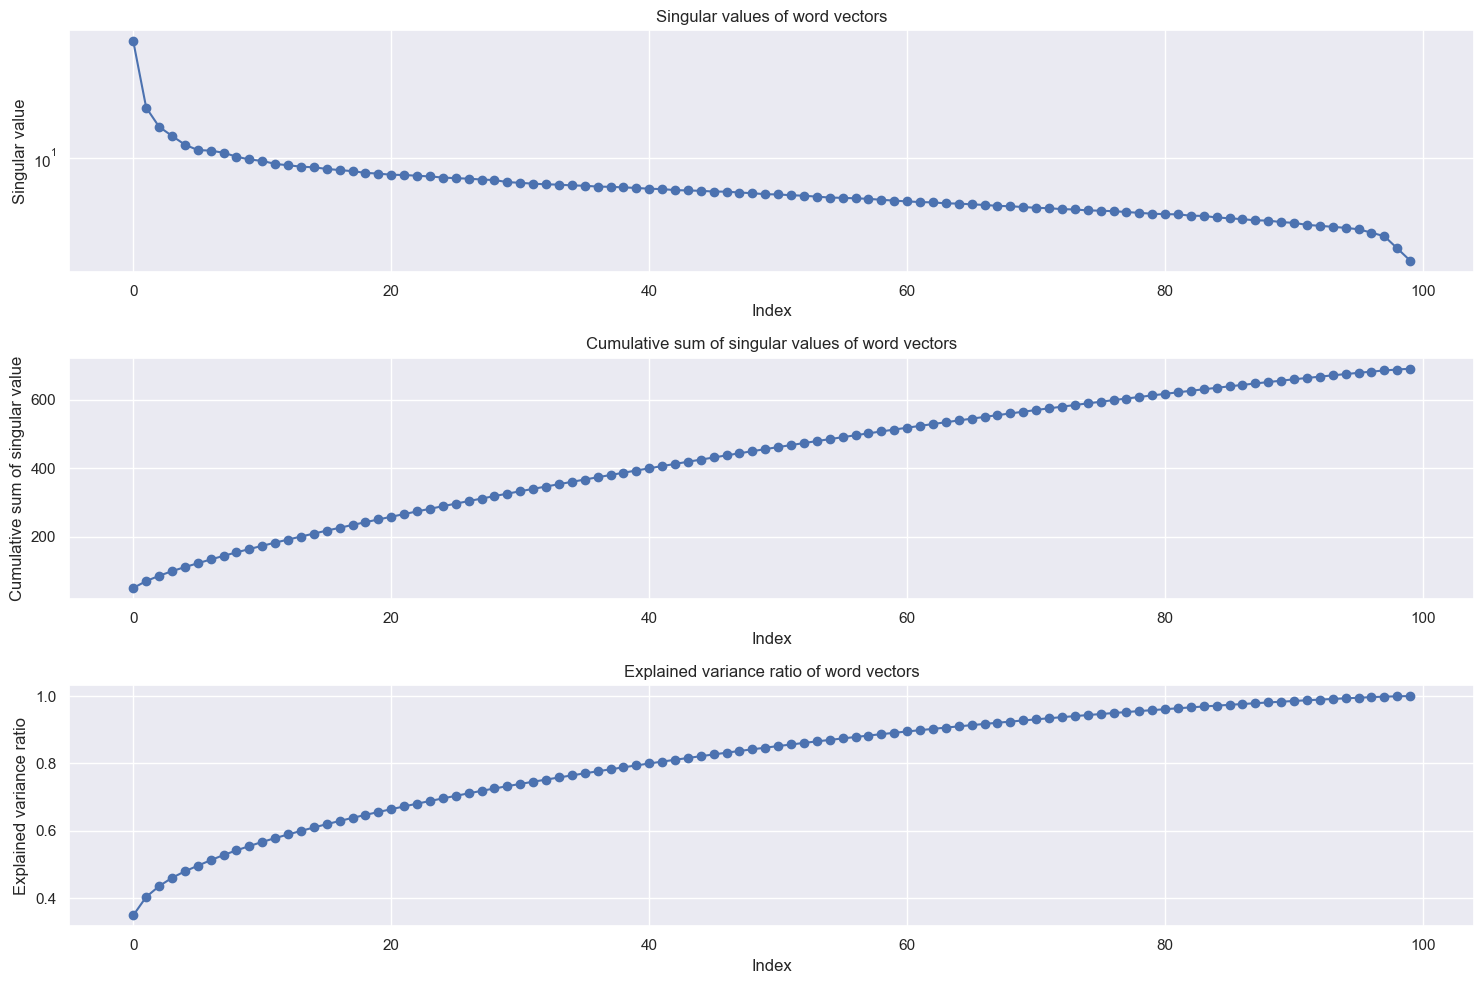

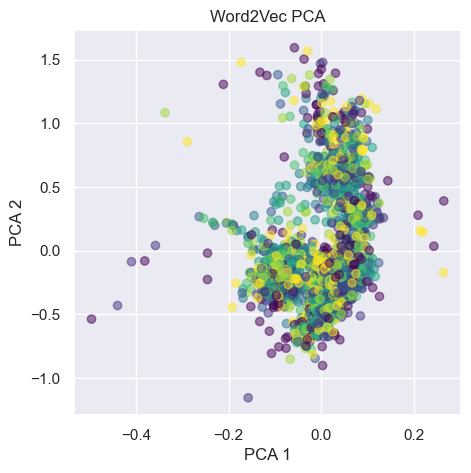

In [13]:
#PCA over the word vectors
wordVectorsCentered = wordVectors - np.mean(wordVectors, axis=0)
U, s, Vt = np.linalg.svd(wordVectors, full_matrices=False)
# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot the singular values
axes[0].semilogy(s, 'o-')
axes[0].set_title('Singular values of word vectors')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Singular value')

# Plot the cumulative sum of the singular values
axes[1].plot(np.cumsum(s), 'o-')
axes[1].set_title('Cumulative sum of singular values of word vectors')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Cumulative sum of singular value')

# Plot the explained variance ratio
axes[2].plot(np.cumsum(s**2) / np.sum(s**2), 'o-')
axes[2].set_title('Explained variance ratio of word vectors')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Explained variance ratio')

# Adjust layout
plt.tight_layout()

plt.show()


wordVectorsPCA = np.dot(wordVectorsCentered, Vt.T)
#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsPCA[:, 0], wordVectorsPCA[:, 1], alpha=0.5, c = startingLetter, cmap='viridis')
plt.title('Word2Vec PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


c:\Polimi\Master\2Sem\NLP-Project\.conda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


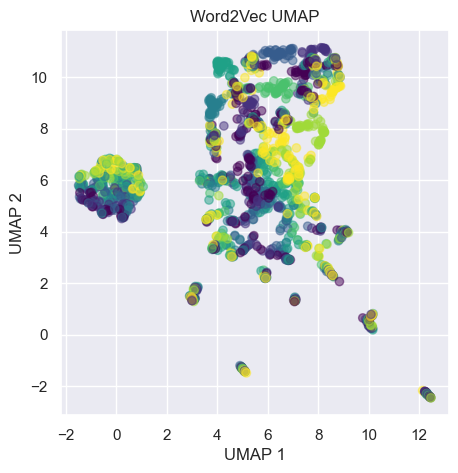

In [14]:
#umap projection
import umap

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
embedding = reducer.fit_transform(wordVectors)
plt.figure(figsize=(5, 5))
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5, c = startingLetter, cmap='viridis')
plt.title('Word2Vec UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


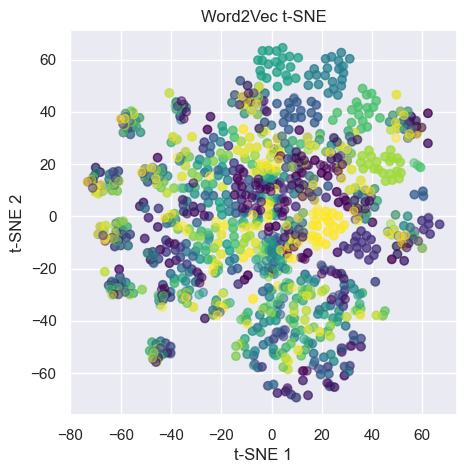

In [15]:
# tsne over the word vectors
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30)

wordVectorsTSNE = tsne.fit_transform(wordVectors)
#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], alpha=0.5, c= startingLetter, cmap='viridis')
plt.title('Word2Vec t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

For n_clusters = 2, the silhouette score is: 0.0631
For n_clusters = 3, the silhouette score is: 0.0678
For n_clusters = 4, the silhouette score is: 0.0286
For n_clusters = 5, the silhouette score is: 0.0236
For n_clusters = 6, the silhouette score is: 0.0156
For n_clusters = 7, the silhouette score is: 0.0026
For n_clusters = 8, the silhouette score is: 0.0297
For n_clusters = 9, the silhouette score is: 0.0335
For n_clusters = 10, the silhouette score is: 0.0192
For n_clusters = 11, the silhouette score is: 0.0249
For n_clusters = 12, the silhouette score is: 0.0295
For n_clusters = 13, the silhouette score is: 0.0186
For n_clusters = 14, the silhouette score is: 0.0175
For n_clusters = 15, the silhouette score is: 0.0220
For n_clusters = 16, the silhouette score is: 0.0281
For n_clusters = 17, the silhouette score is: 0.0270
For n_clusters = 18, the silhouette score is: 0.0280
For n_clusters = 19, the silhouette score is: 0.0322
For n_clusters = 20, the silhouette score is: 0.0325
F

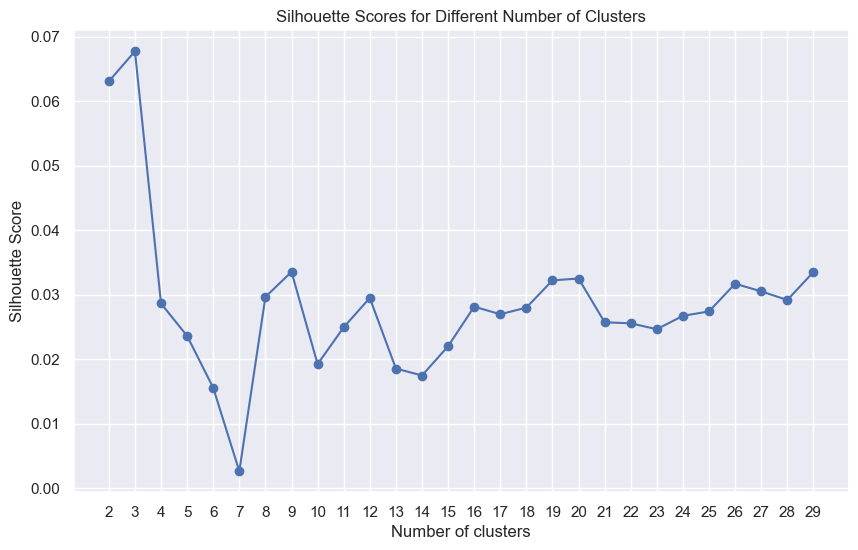

Best number of clusters: 3
Number of clusters: 3


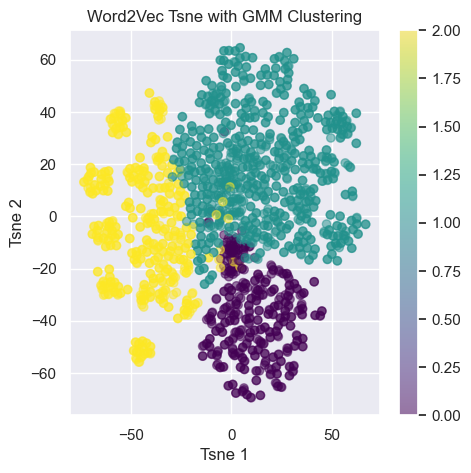

In [ ]:
#Perform gaussian mixture model clustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
# Apply the elbow method to find the optimal number of clusters using silhouette scores
silhouette_scores = []
range_n_clusters = range(2, 30)
for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    cluster_labels = gmm.fit_predict(wordVectors)
    silhouette_avg = silhouette_score(wordVectors, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg:.4f}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.show()

Best number of clusters: 9
Number of clusters: 9


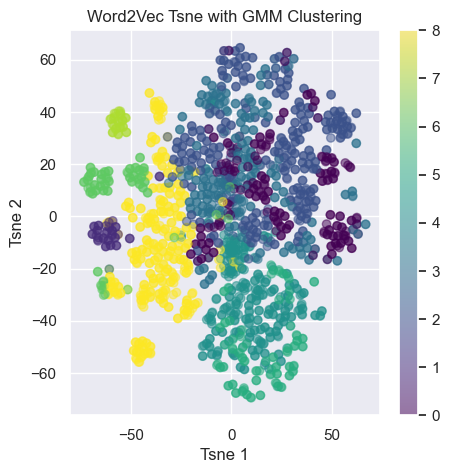

In [23]:
# Find the optimal number of clusters
best_n_clusters = 9
print(f"Best number of clusters: {best_n_clusters}")

# Fit the GMM with the optimal number of clusters
gmm = GaussianMixture(n_components=best_n_clusters, random_state=0)
gmm.fit(wordVectors)
clusters = gmm.predict(wordVectors)
#Print the number of clusters
print(f'Number of clusters: {len(np.unique(clusters))}')
#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], c=clusters, alpha=0.5, cmap='viridis')
plt.title('Word2Vec Tsne with GMM Clustering')
plt.xlabel('Tsne 1')
plt.ylabel('Tsne 2')
plt.colorbar()
plt.show()

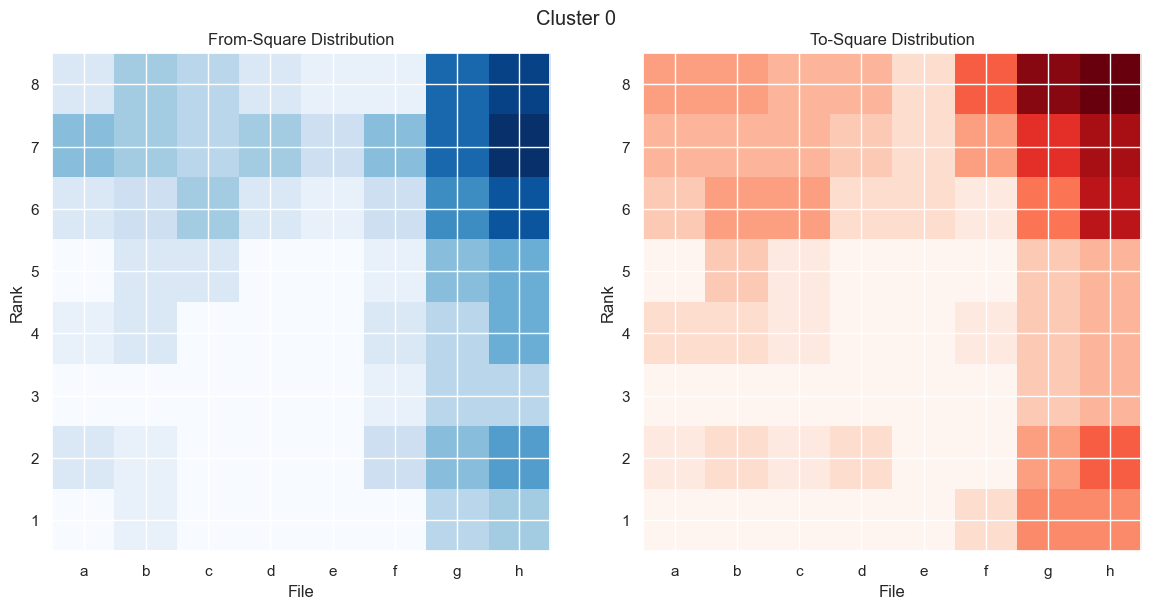

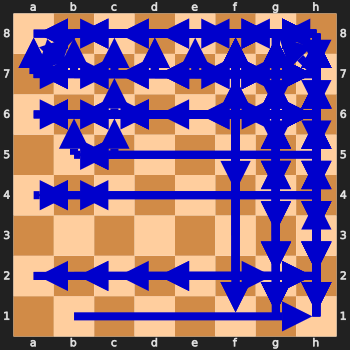

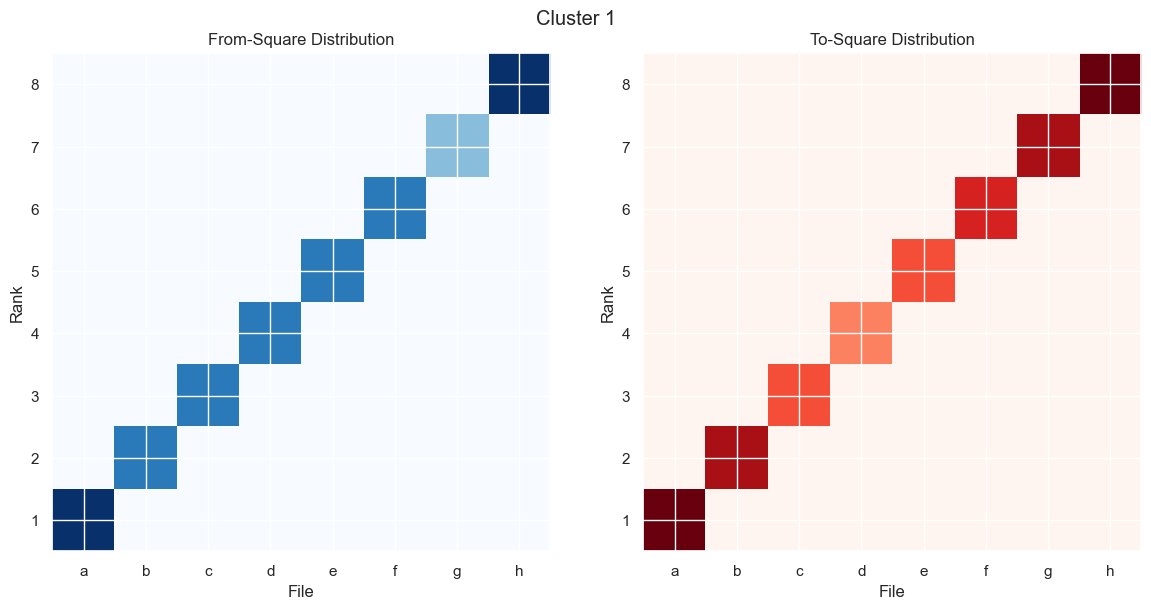

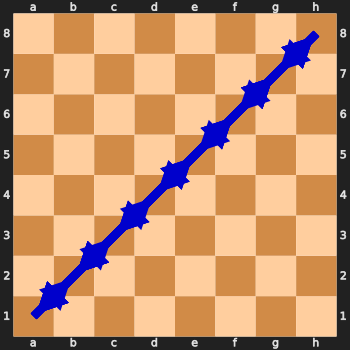

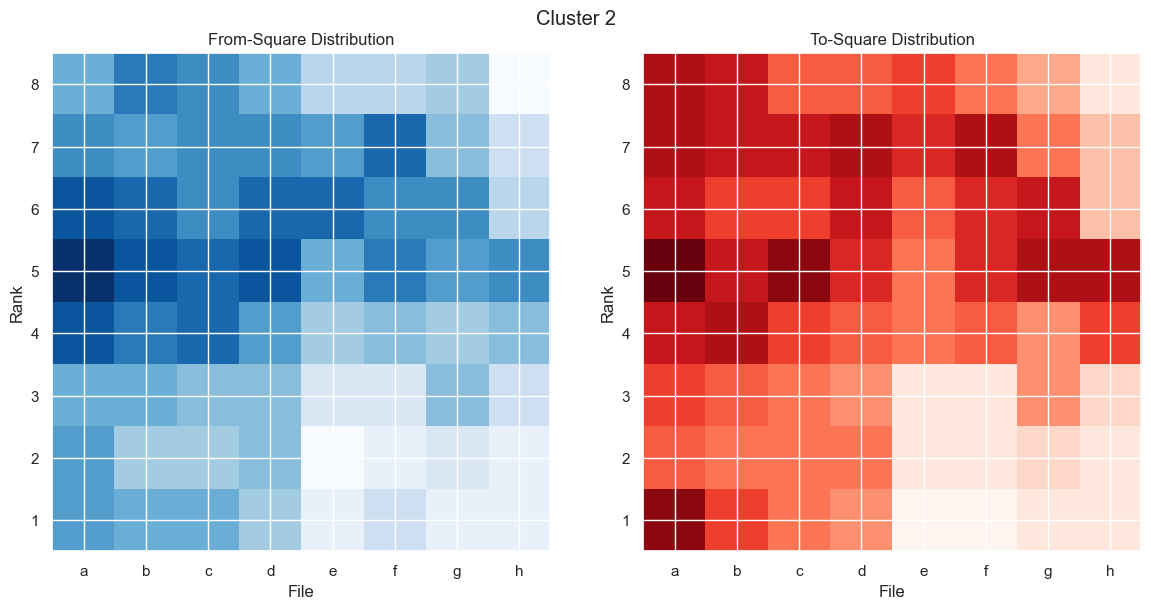

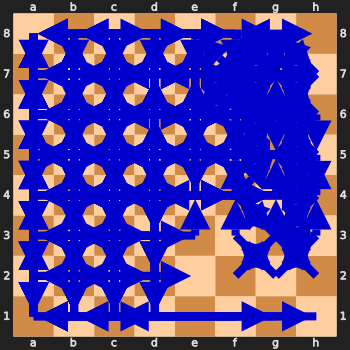

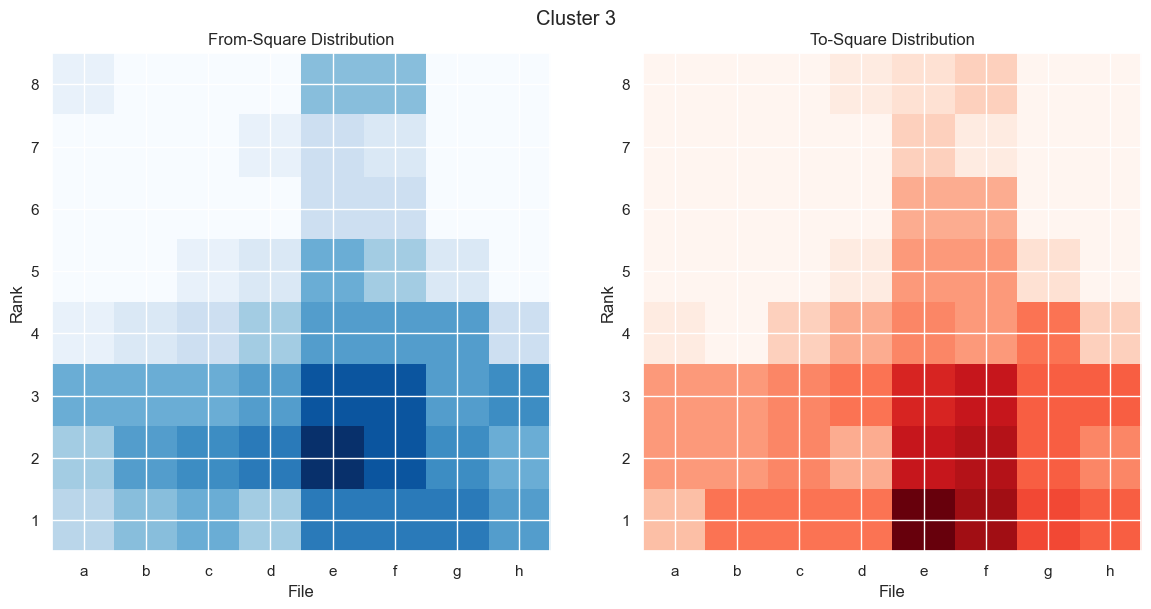

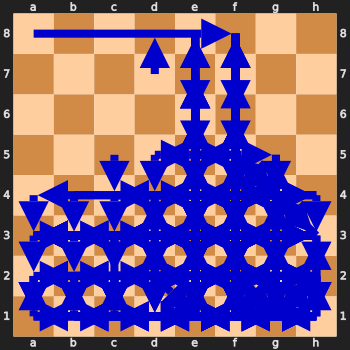

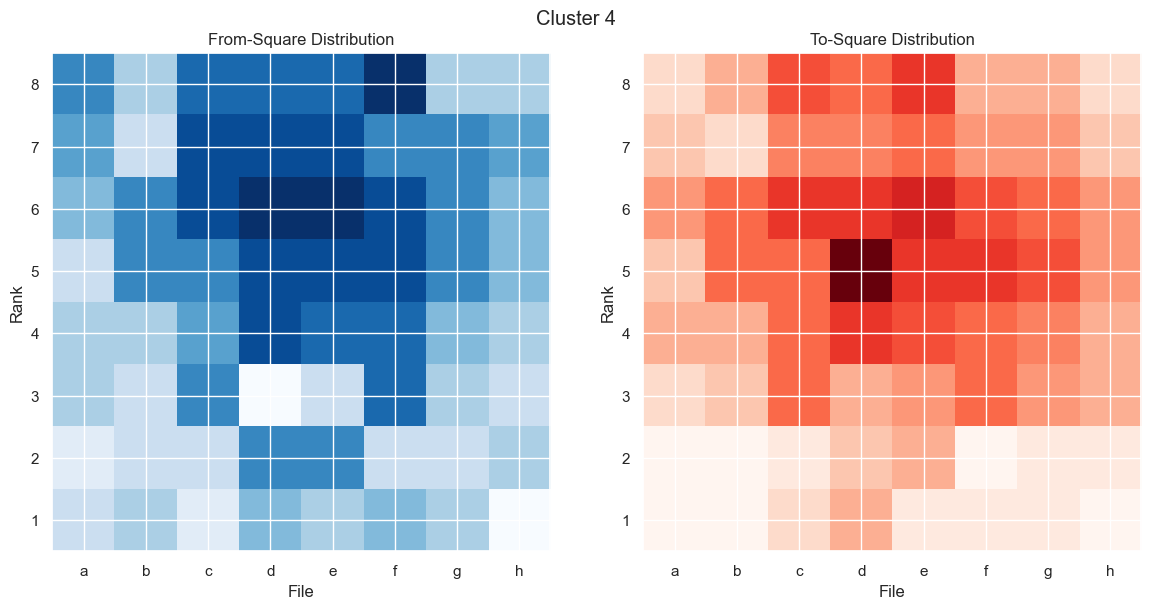

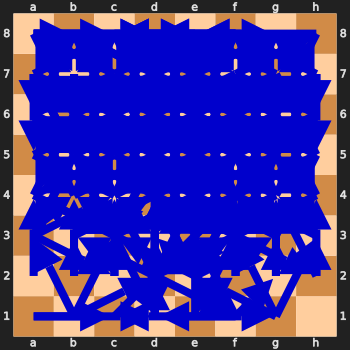

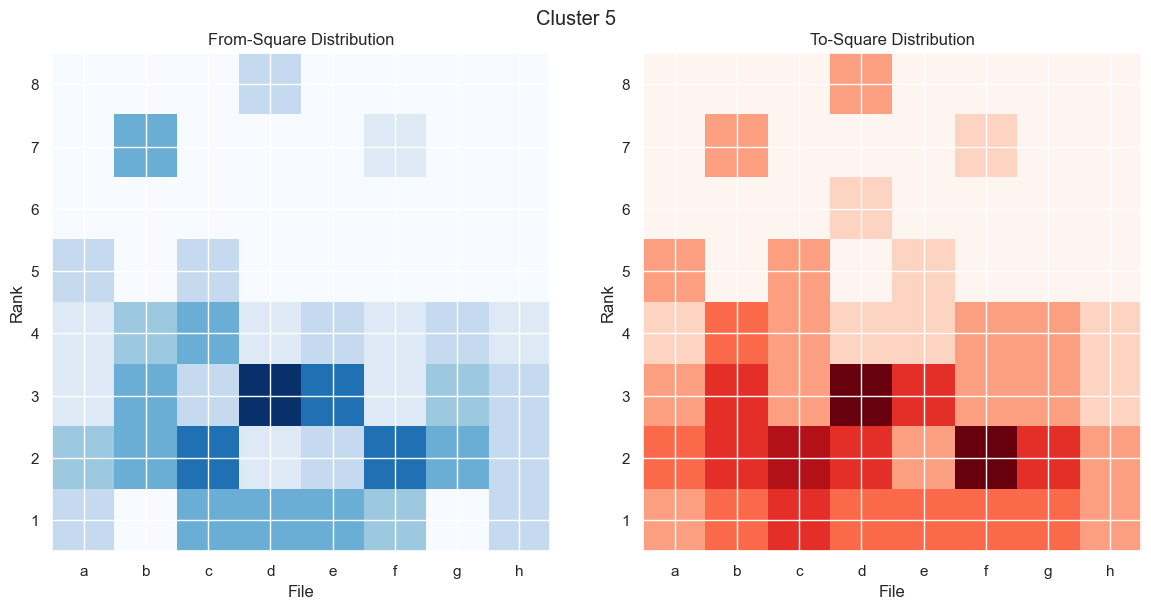

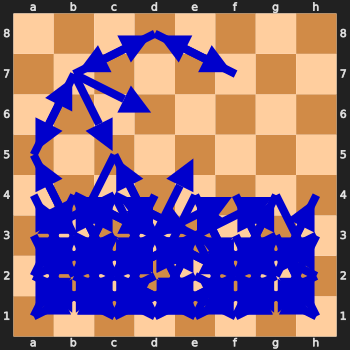

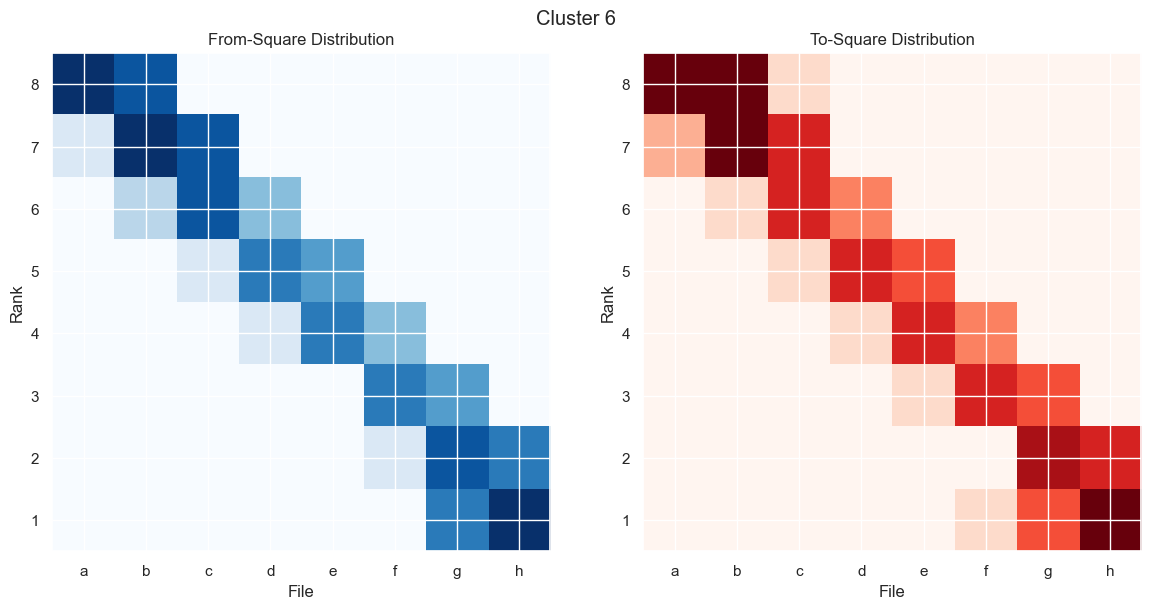

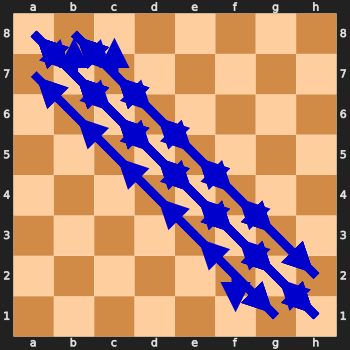

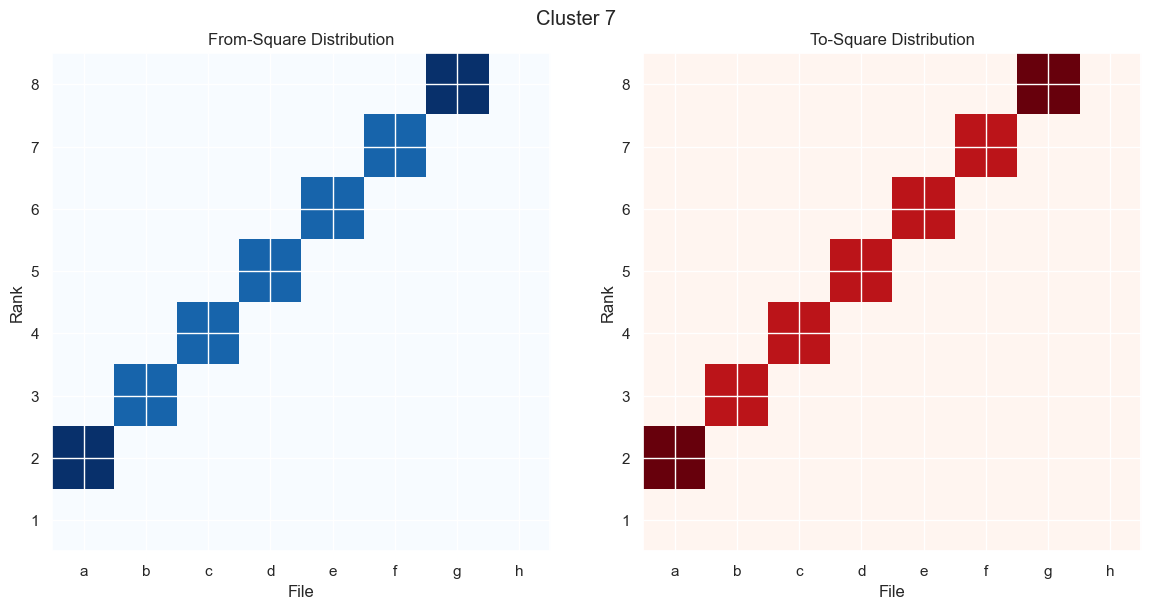

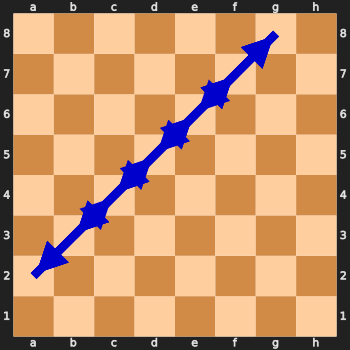

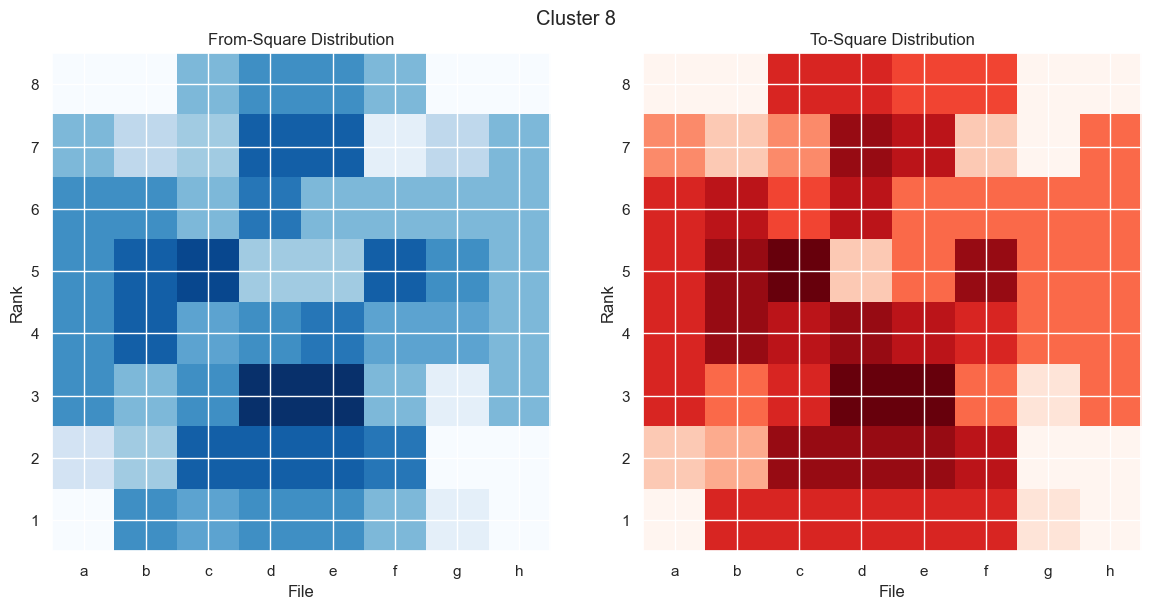

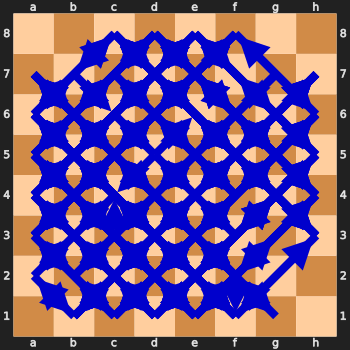

In [ ]:
maxCluster = np.max(clusters)
for i in range(maxCluster + 1):
    clusterMoves = dictionary[clusters == i]
    movePlotter = MovePlotter(title=f'Cluster {i}')
    for move in clusterMoves:
        movePlotter.addMove(move)
    movePlotter.plot()

Number of clusters found: 25
Percentage of noise points: 0.9305631492618918


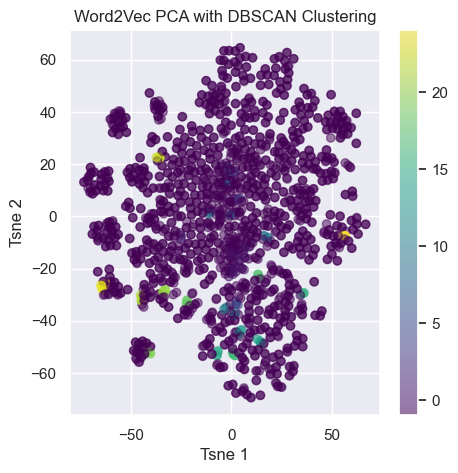

In [29]:
#DBscan clustering using cosine distance
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.15,min_samples=3, metric='cosine')

dbscan.fit(wordVectors)
clusters = dbscan.labels_
maxCluster = np.max(clusters)

#Print the number of clusters found
print(f'Number of clusters found: {len(set(clusters)) - (1 if -1 in clusters else 0)}')
print(f'Percentage of noise points: {list(clusters).count(-1)/len(clusters)}')

#Print number of 

#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], c=clusters, alpha=0.5, cmap='viridis')
plt.title('Word2Vec PCA with DBSCAN Clustering')
plt.xlabel('Tsne 1')
plt.ylabel('Tsne 2')
plt.colorbar()
plt.show()


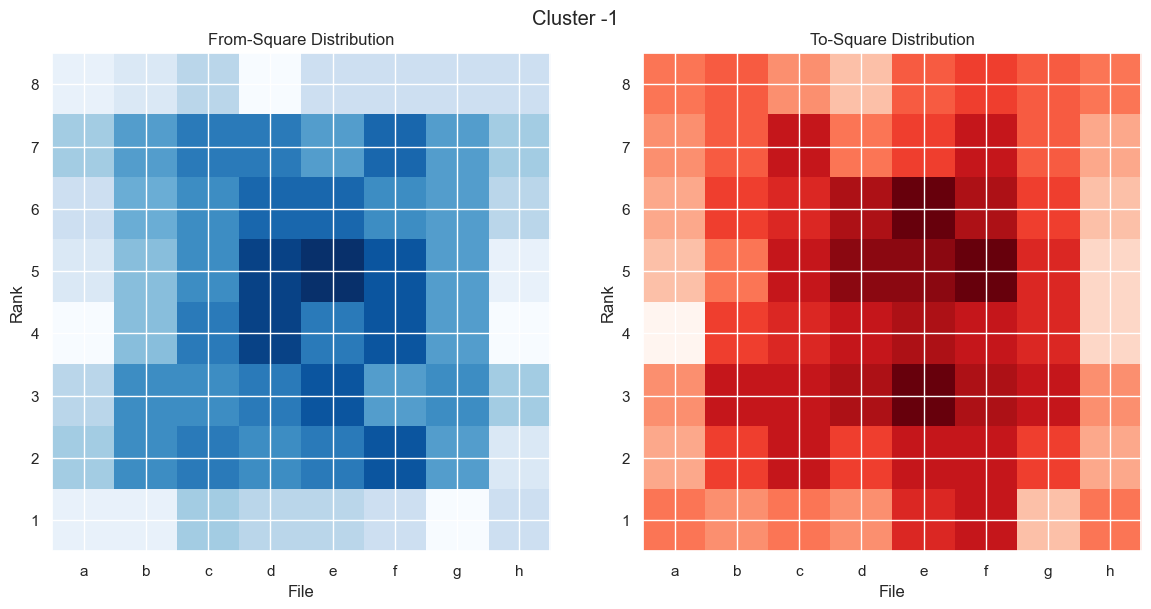

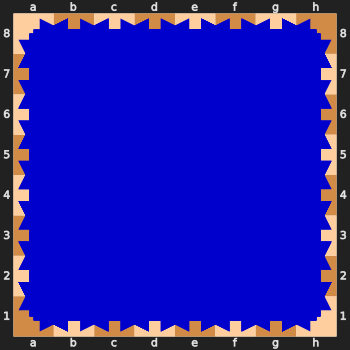

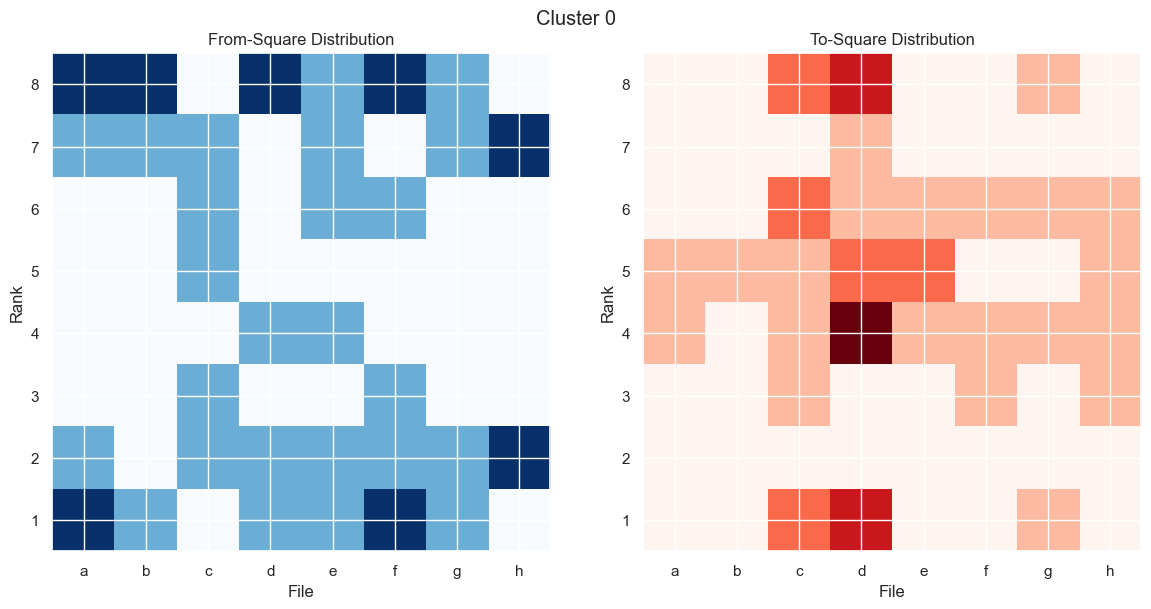

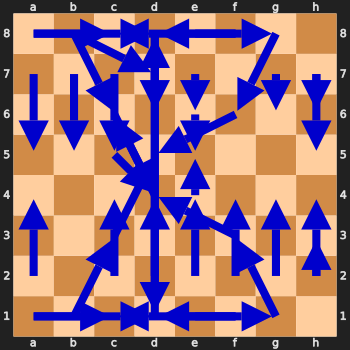

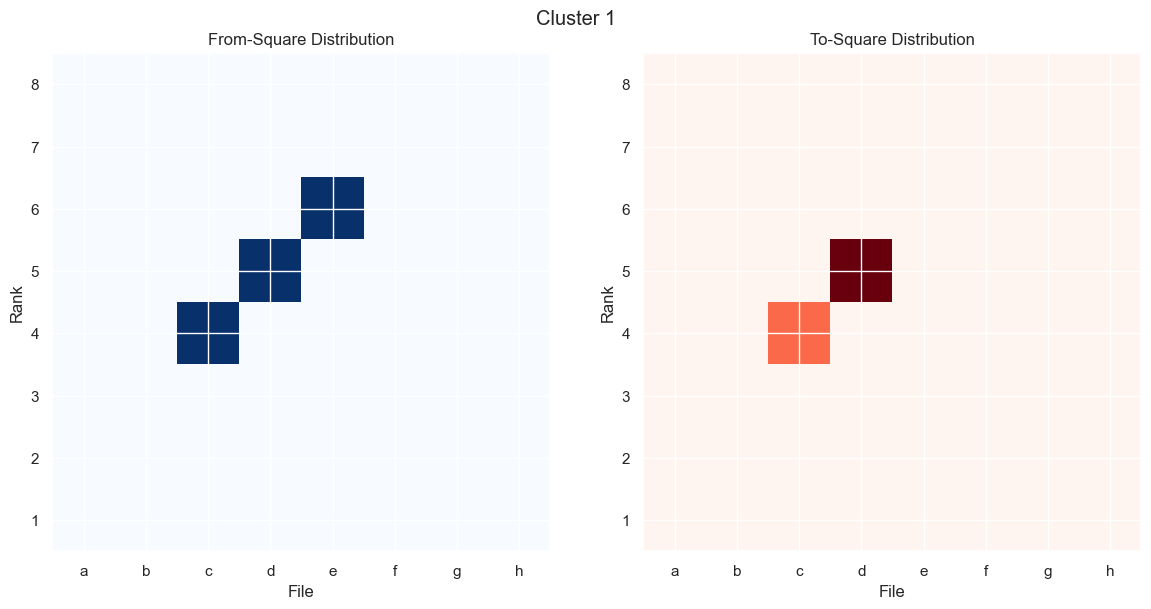

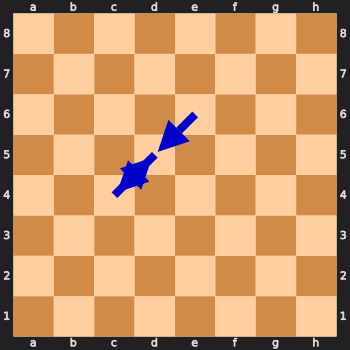

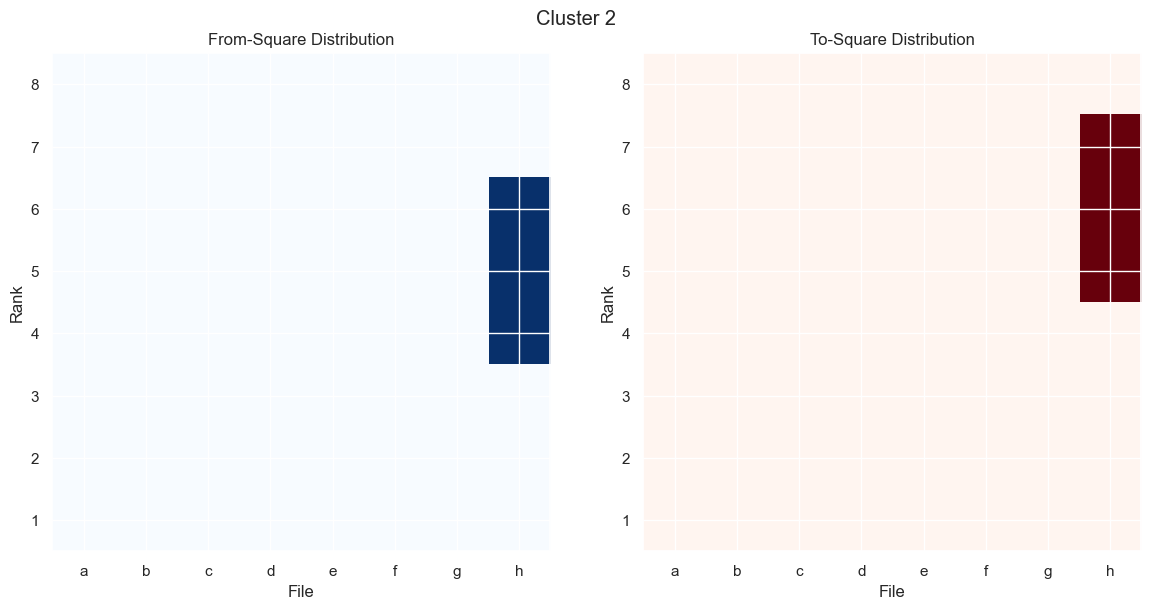

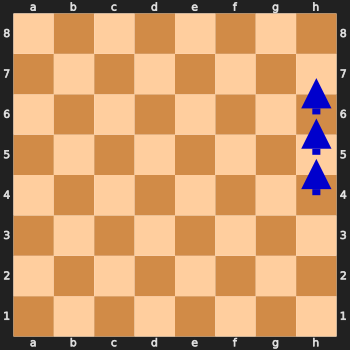

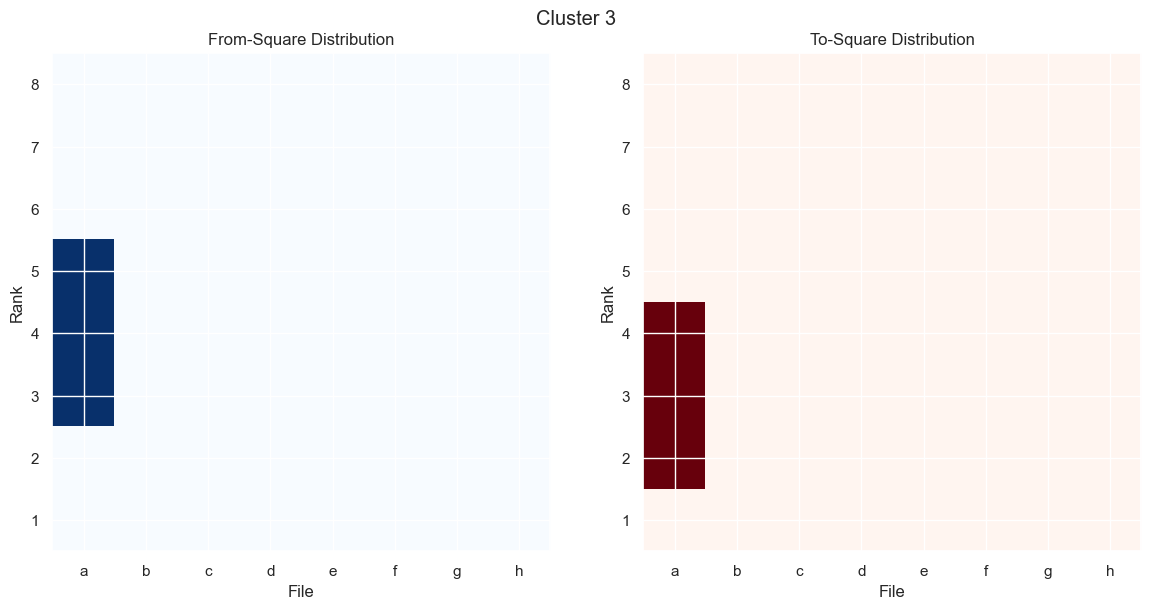

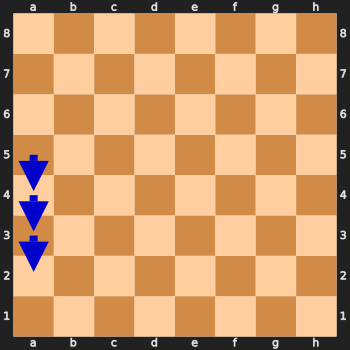

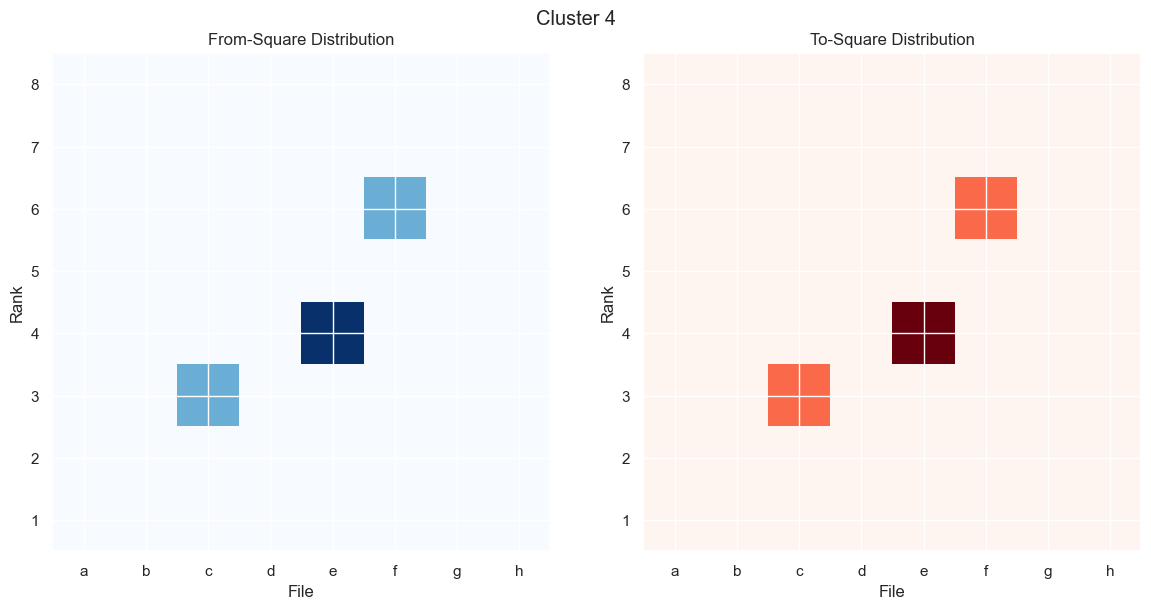

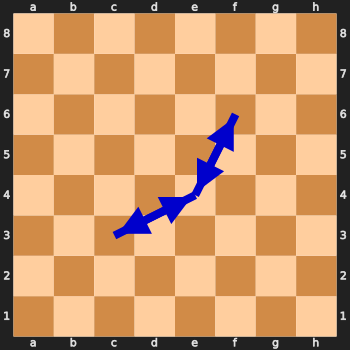

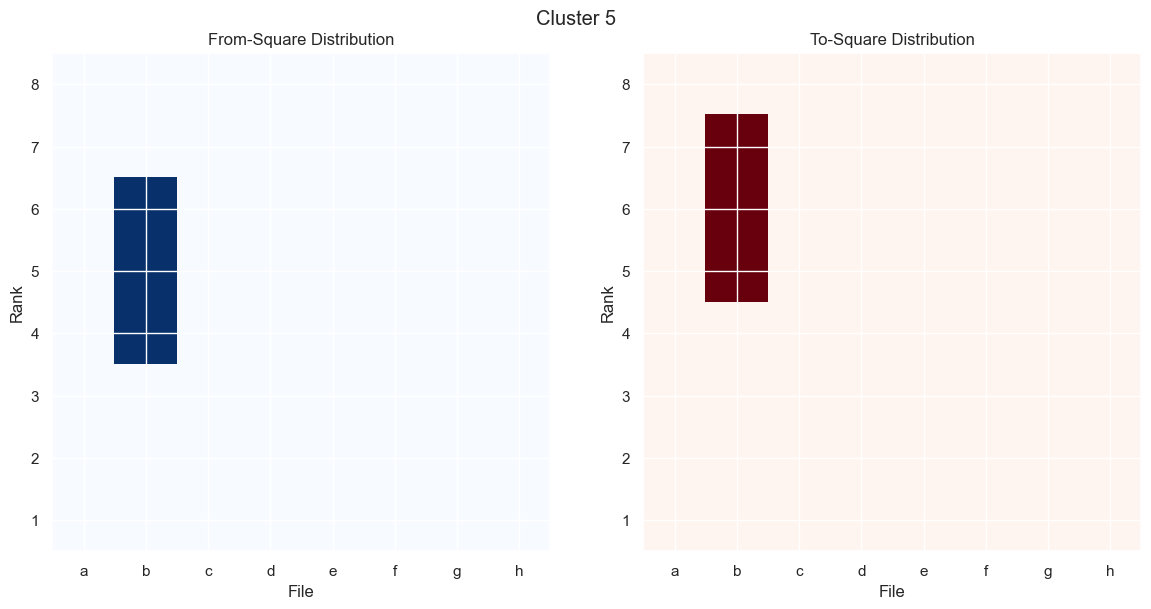

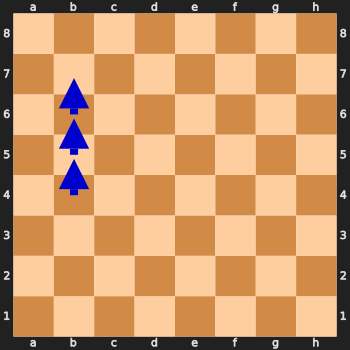

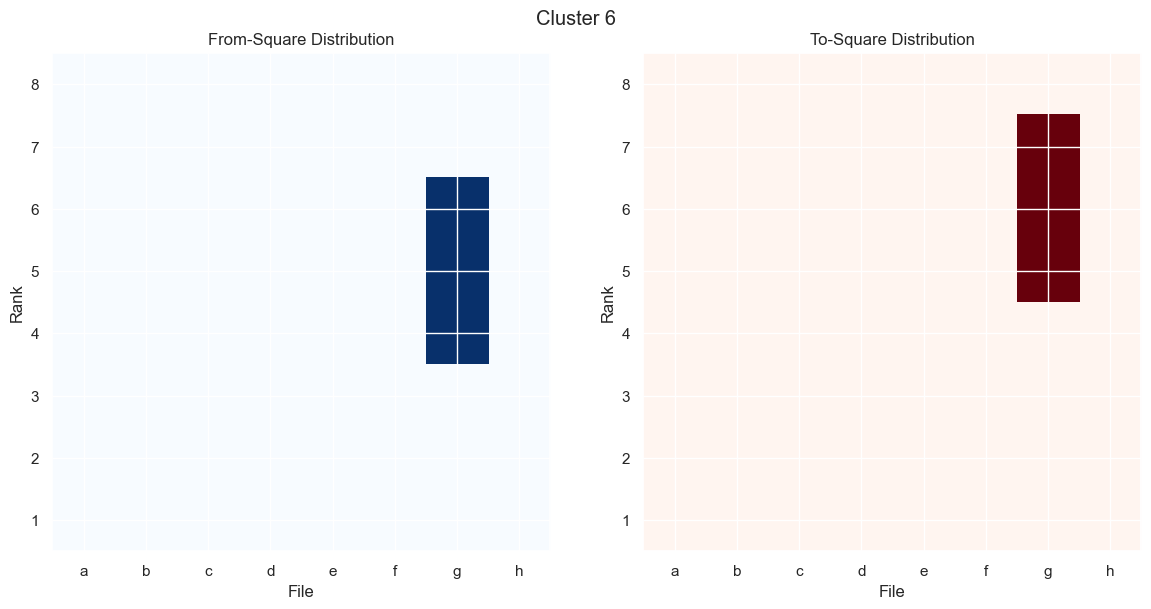

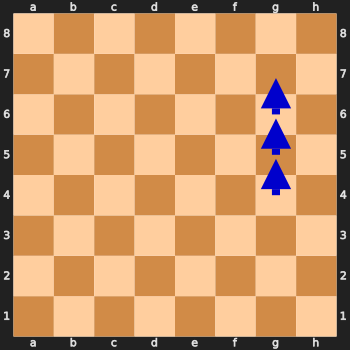

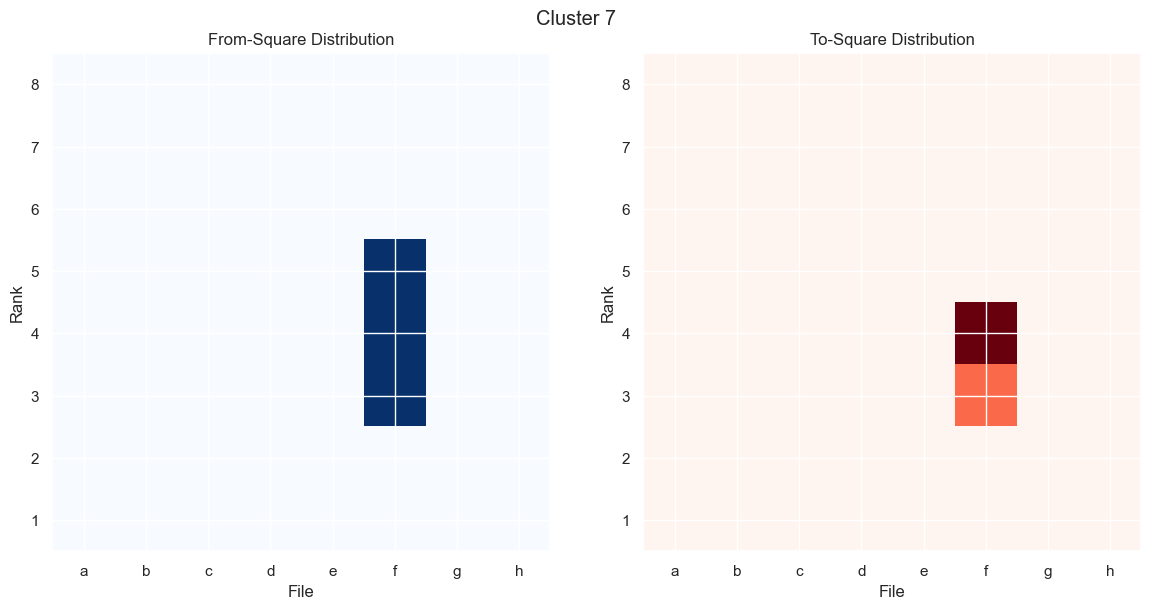

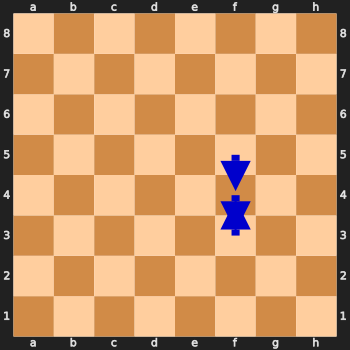

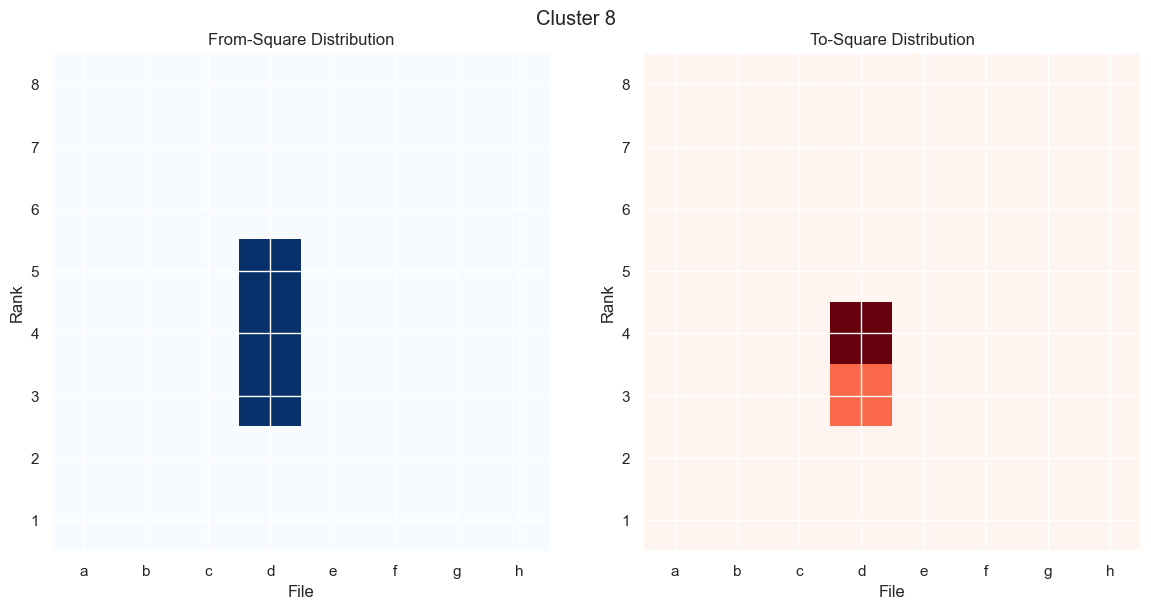

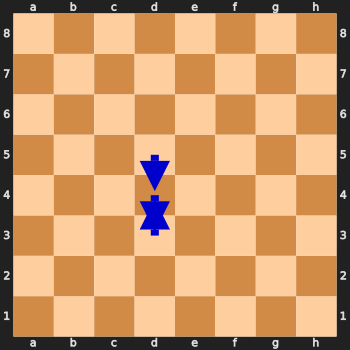

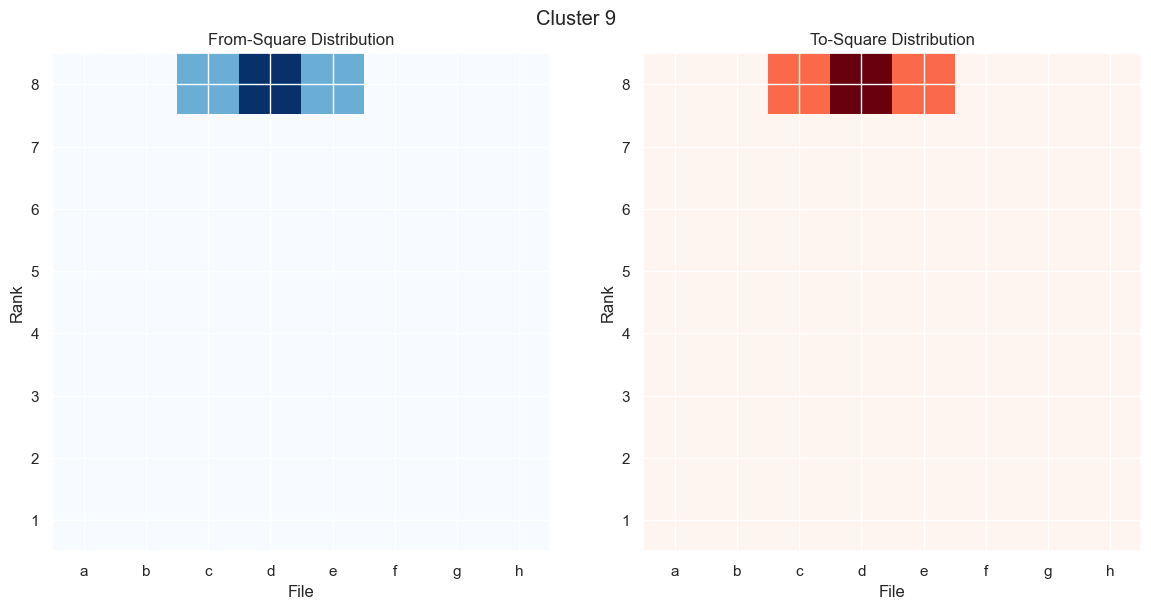

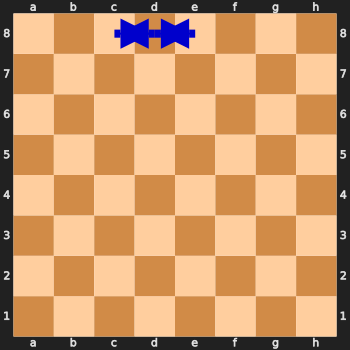

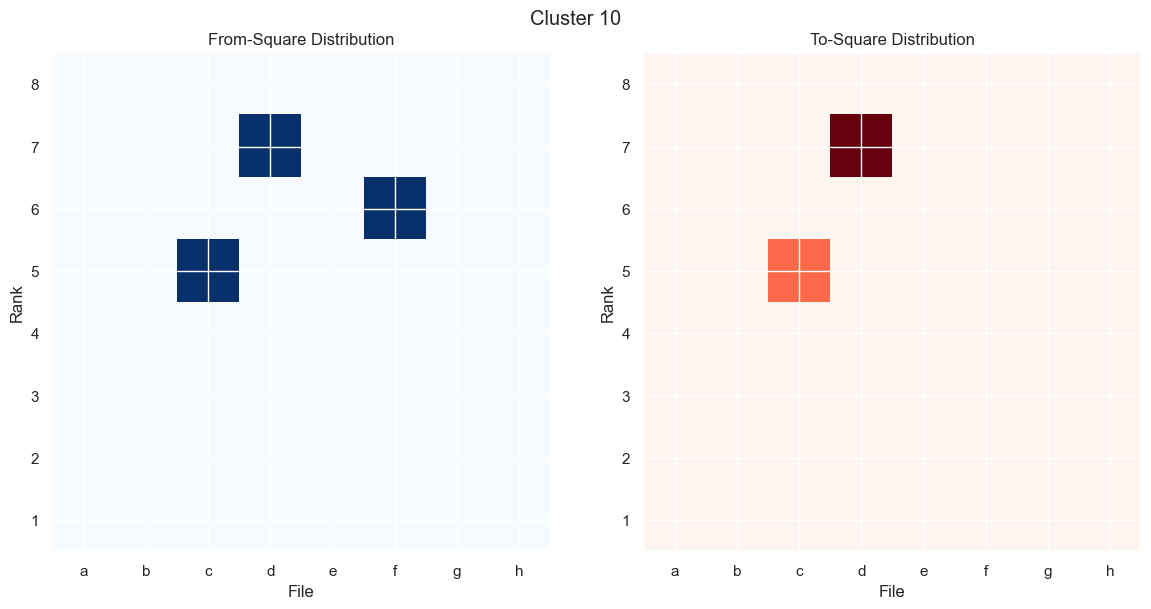

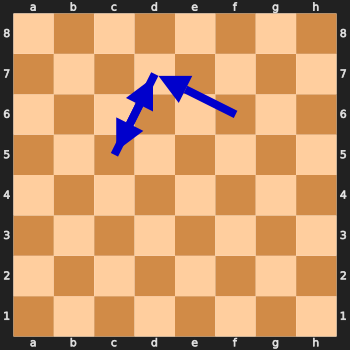

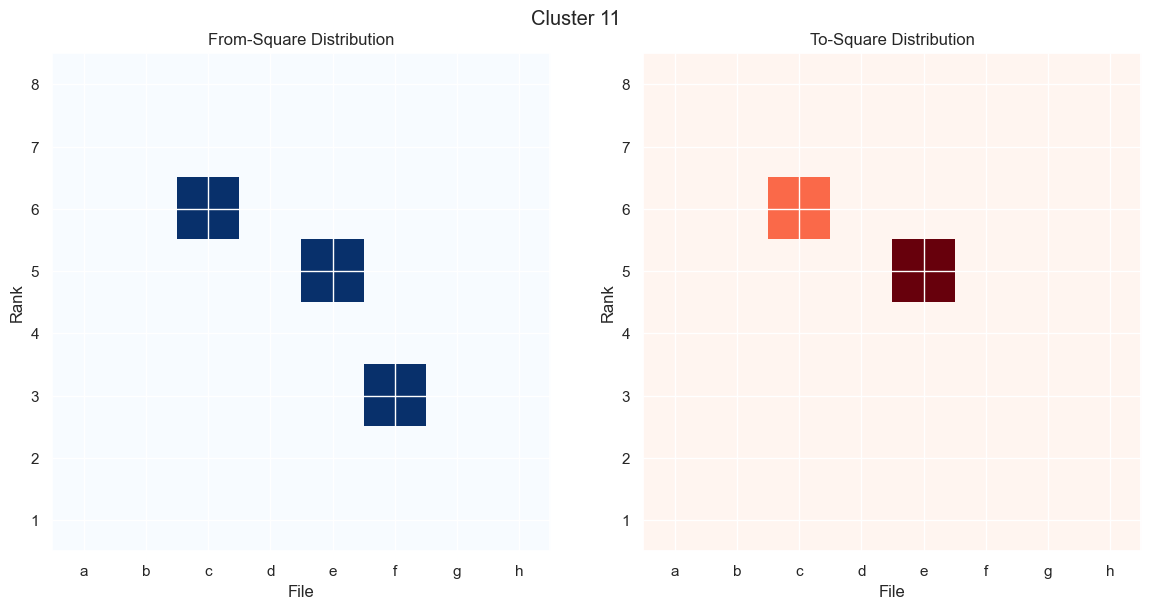

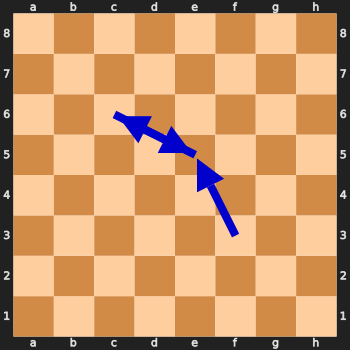

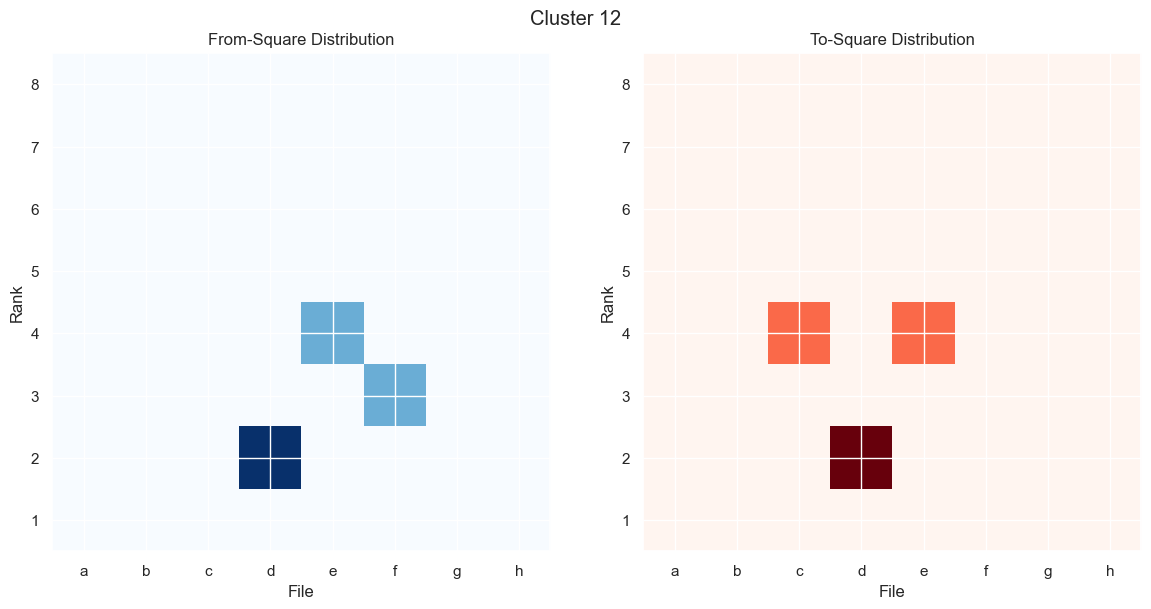

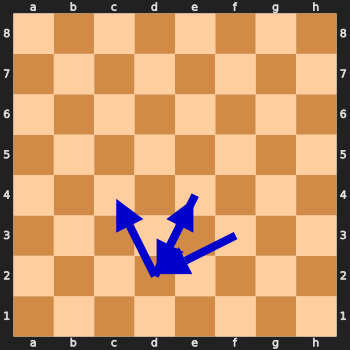

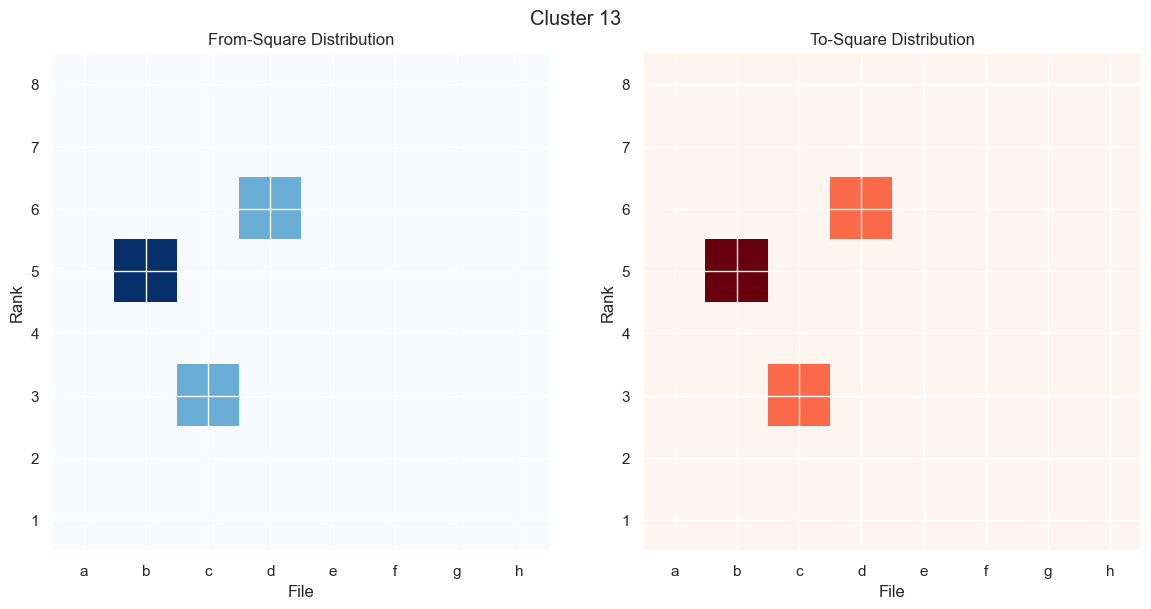

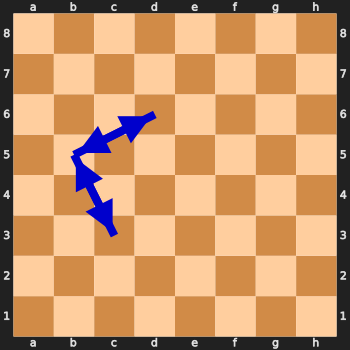

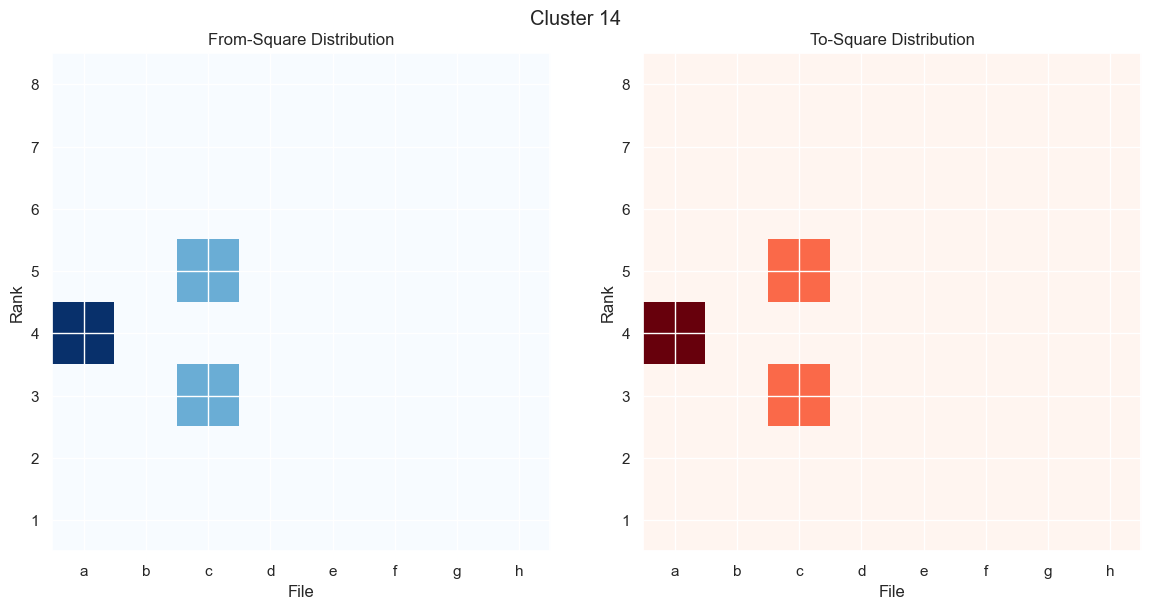

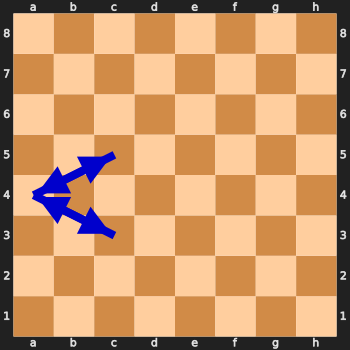

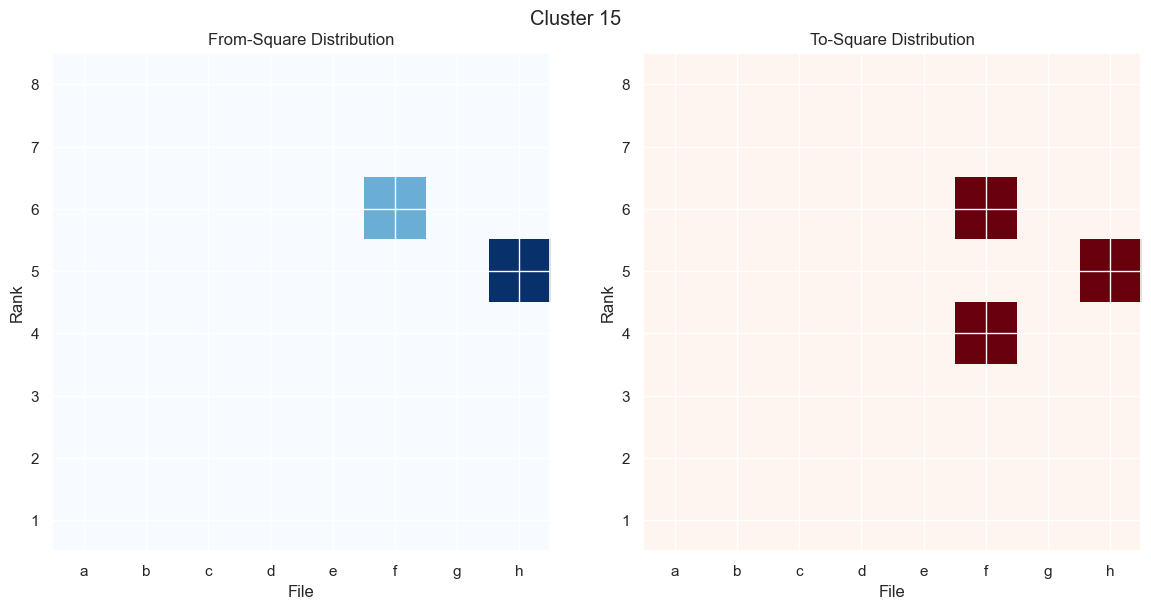

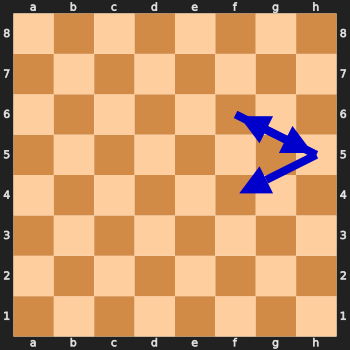

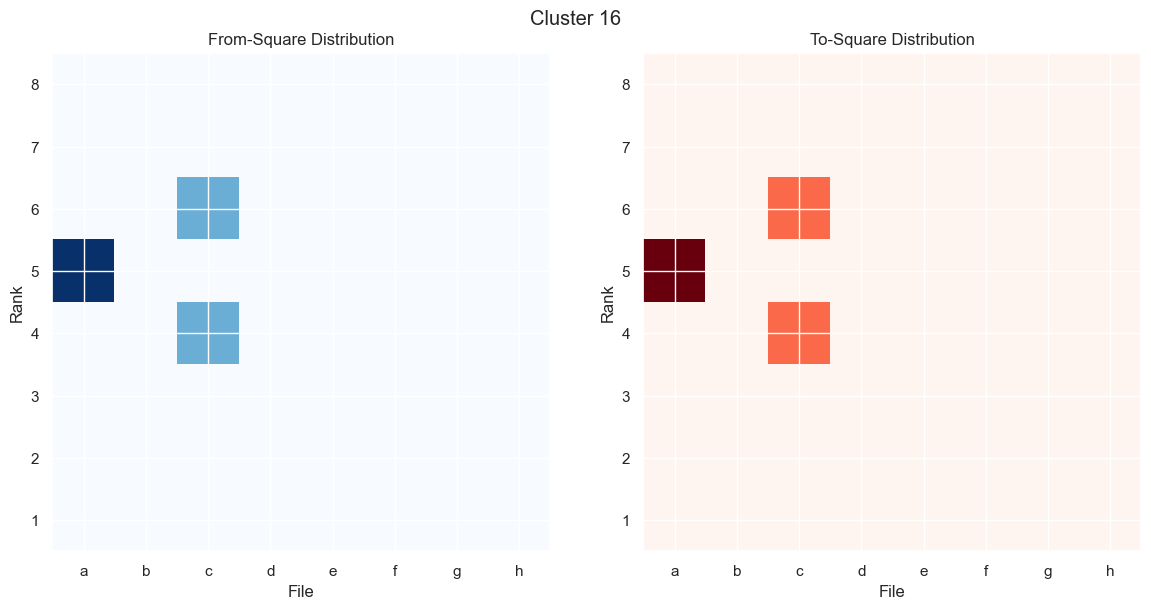

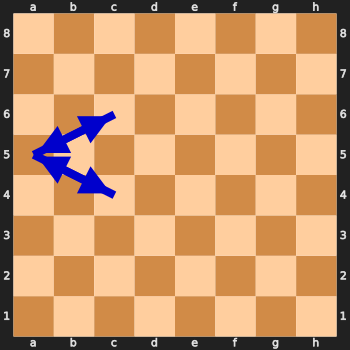

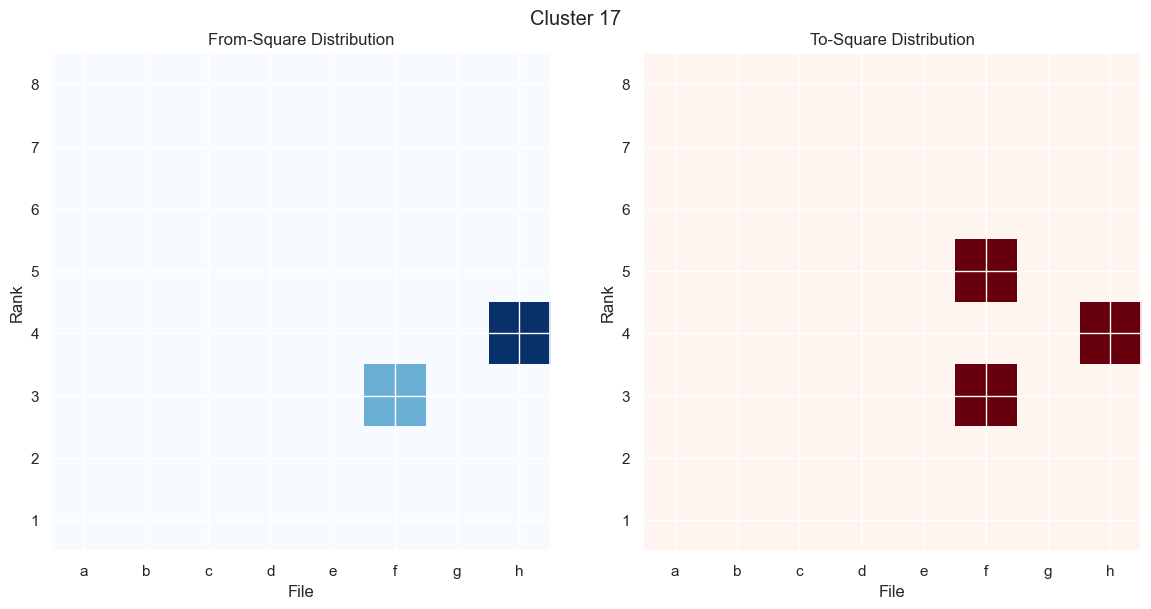

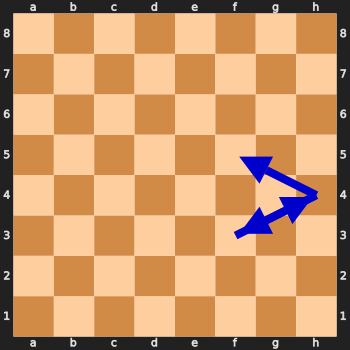

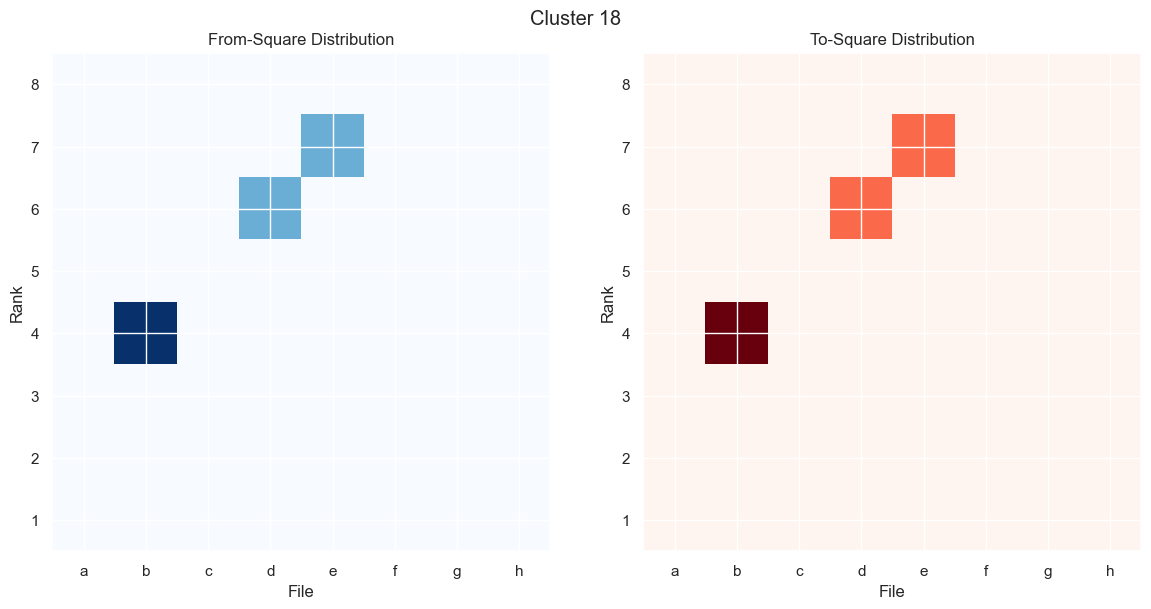

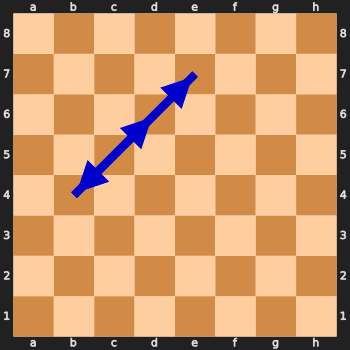

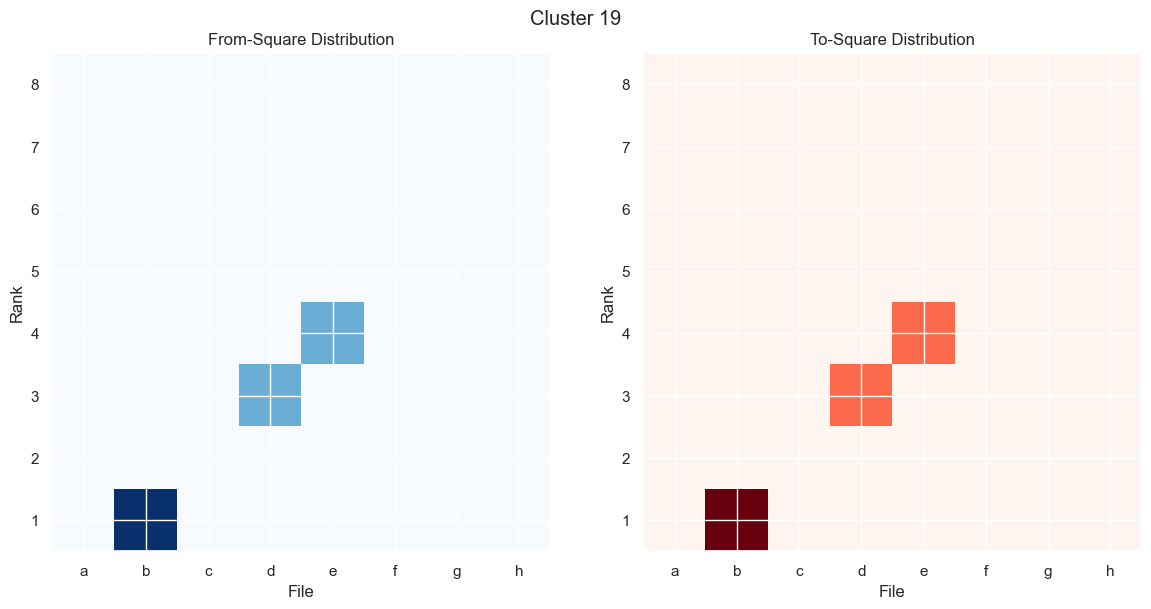

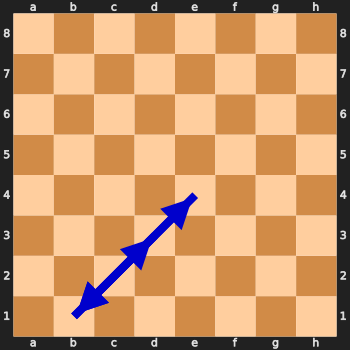

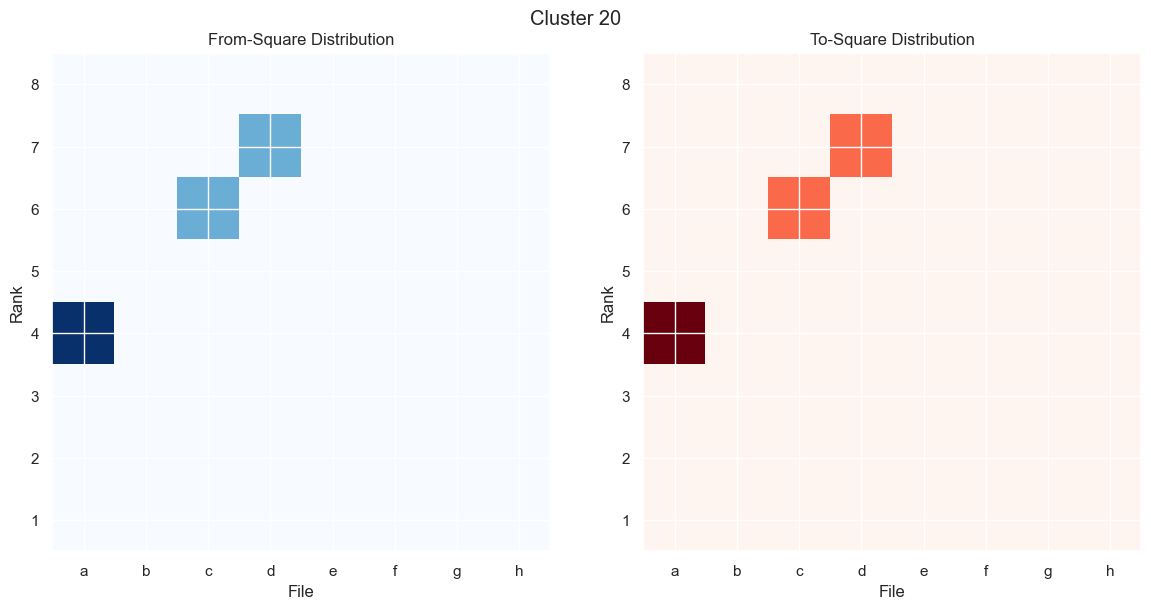

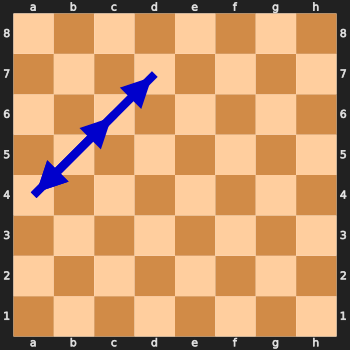

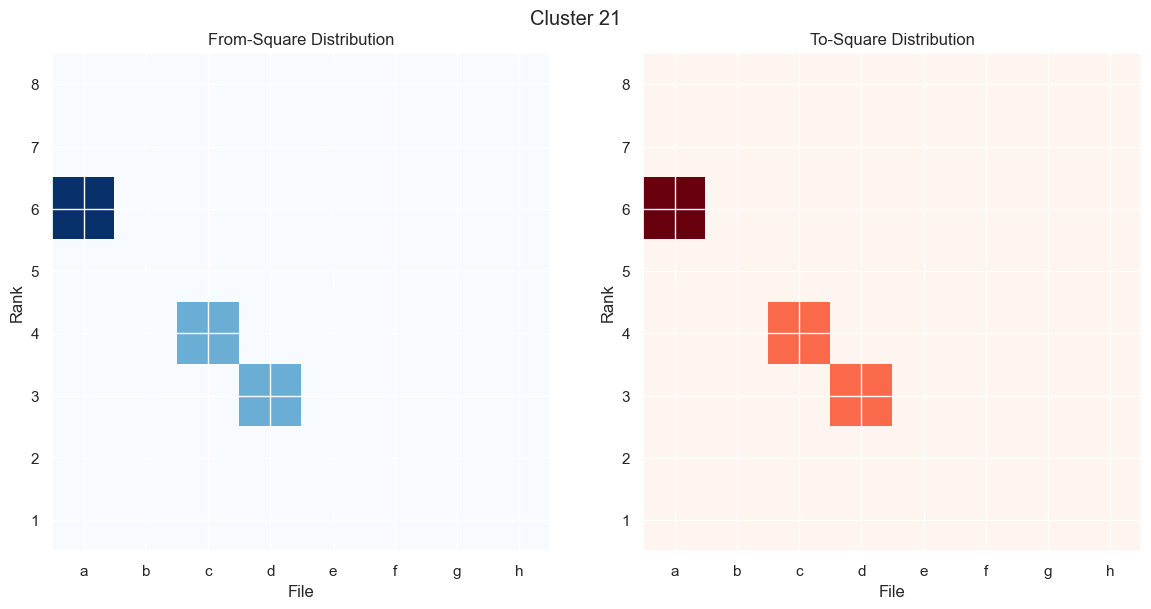

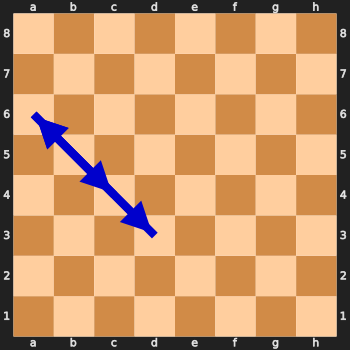

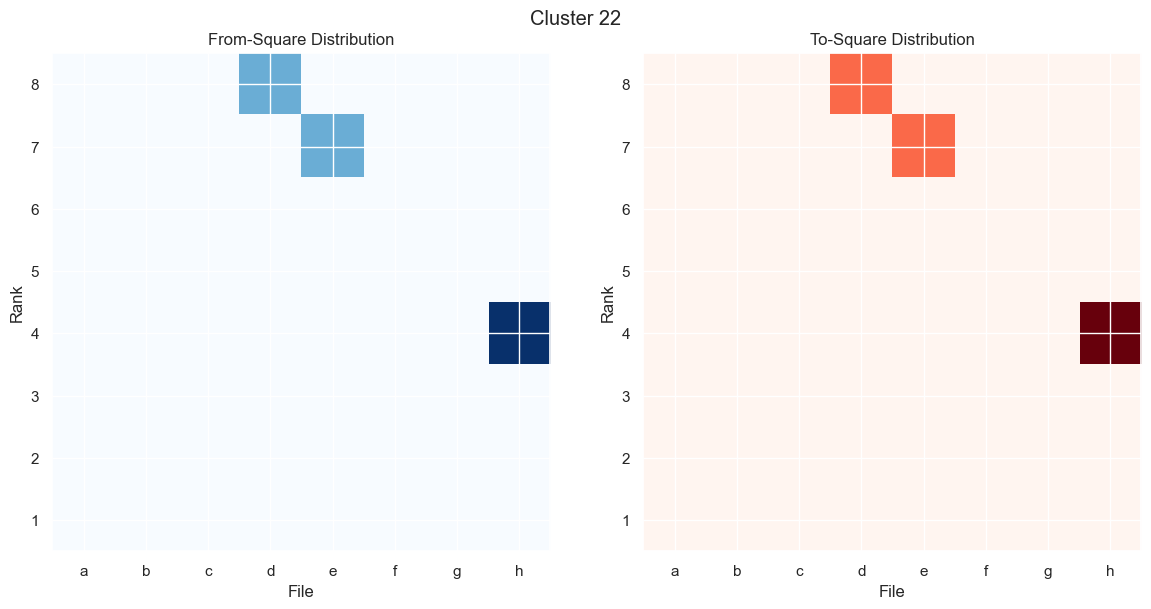

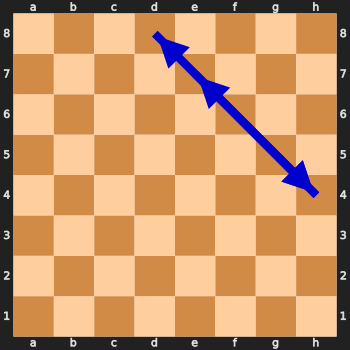

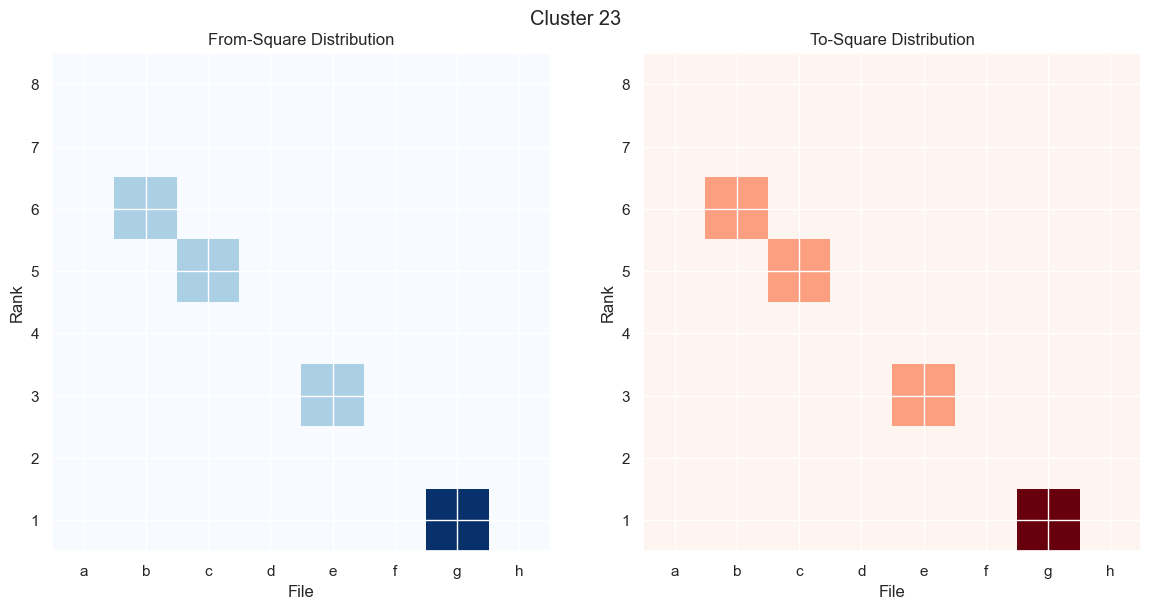

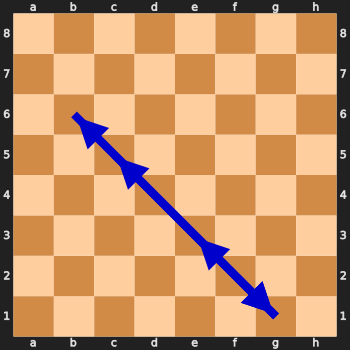

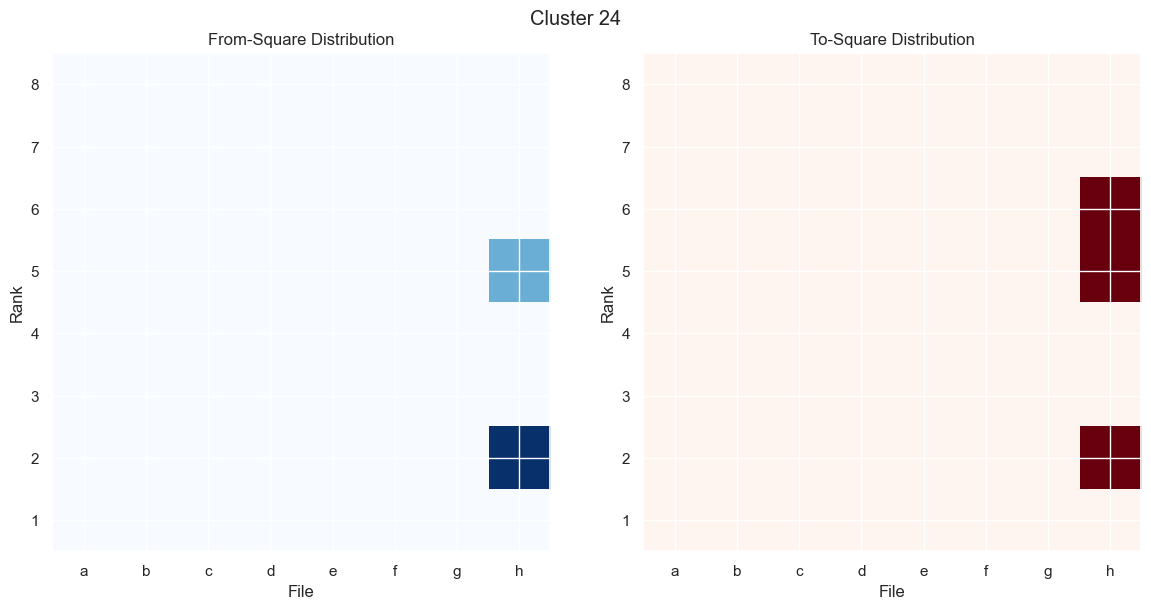

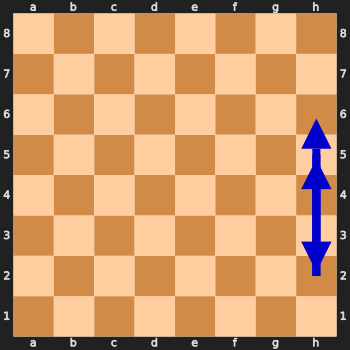

In [ ]:
#Plot the clusters using the move plotter
for i in range(-1, maxCluster + 1):
    clusterMoves = dictionary[clusters == i]
    movePlotter = MovePlotter(title=f'Cluster {i}')
    for move in clusterMoves:
        movePlotter.addMove(move)
    movePlotter.plot()

For n_clusters = 2, the silhouette score is: 0.1362
For n_clusters = 3, the silhouette score is: 0.0429
For n_clusters = 4, the silhouette score is: 0.0508
For n_clusters = 5, the silhouette score is: 0.0333
For n_clusters = 6, the silhouette score is: 0.0258
For n_clusters = 7, the silhouette score is: 0.0239
For n_clusters = 8, the silhouette score is: 0.0186
For n_clusters = 9, the silhouette score is: 0.0076
For n_clusters = 10, the silhouette score is: -0.0011
For n_clusters = 11, the silhouette score is: 0.0033
For n_clusters = 12, the silhouette score is: 0.0026
For n_clusters = 13, the silhouette score is: -0.0042
For n_clusters = 14, the silhouette score is: -0.0017
For n_clusters = 15, the silhouette score is: -0.0010
For n_clusters = 16, the silhouette score is: 0.0025
For n_clusters = 17, the silhouette score is: 0.0008
For n_clusters = 18, the silhouette score is: -0.0015
For n_clusters = 19, the silhouette score is: 0.0014
For n_clusters = 20, the silhouette score is: 0.0

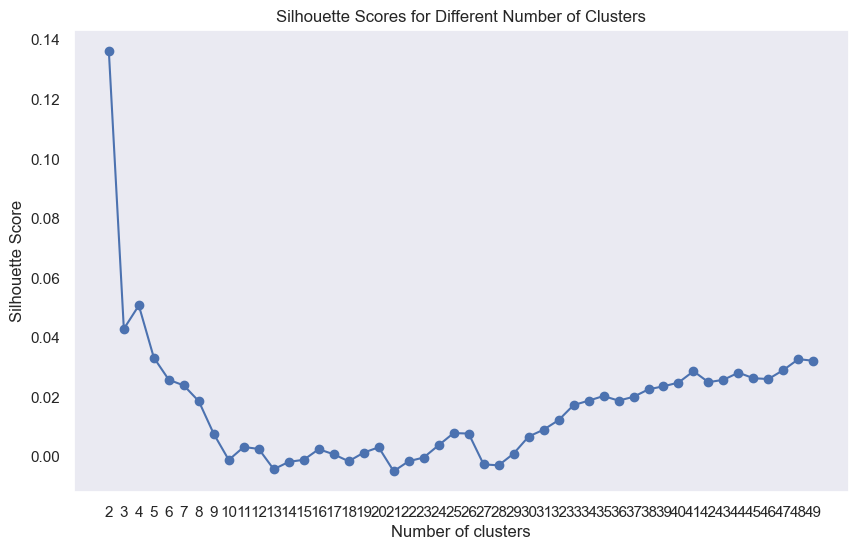

In [ ]:
#Cluster with Kmean with elbow method with cosine distance

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

# Compute the cosine distance matrix
cosine_distance_matrix = pairwise_distances(wordVectors, metric='cosine')
# Compute the silhouette scores for different values of k
silhouette_scores = []
range_n_clusters = range(2, 50)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(cosine_distance_matrix)
    silhouette_avg = silhouette_score(cosine_distance_matrix, cluster_labels, metric='precomputed')
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg:.4f}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

Best number of clusters: 10


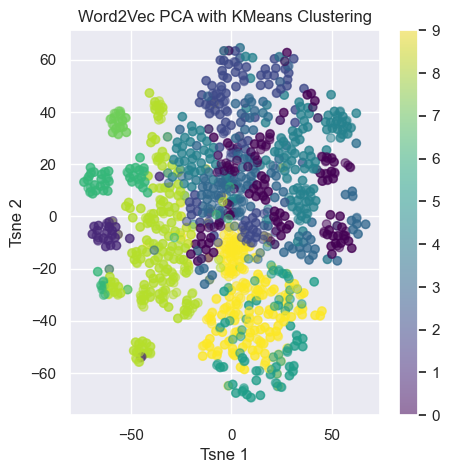

In [31]:
best_n_clusters = 10
print(f"Best number of clusters: {best_n_clusters}")

kmeans = KMeans(n_clusters=best_n_clusters, random_state=0)
kmeans.fit(wordVectors)
clusters = kmeans.labels_

#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], c=clusters, alpha=0.5, cmap='viridis')
plt.title('Word2Vec PCA with KMeans Clustering')
plt.xlabel('Tsne 1')
plt.ylabel('Tsne 2')
plt.colorbar()
plt.show()

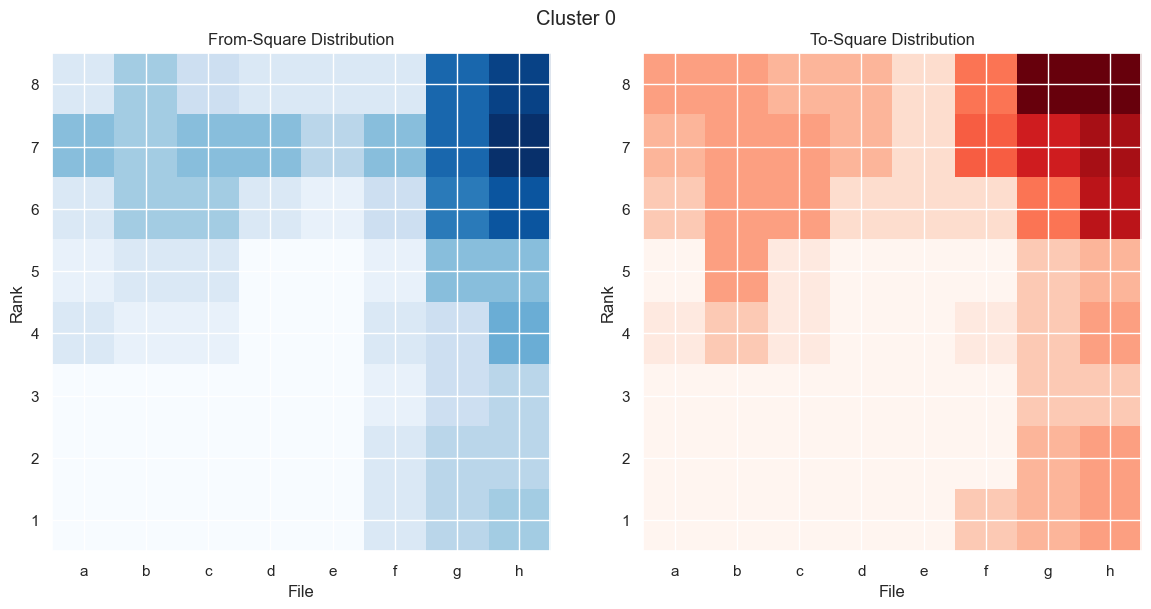

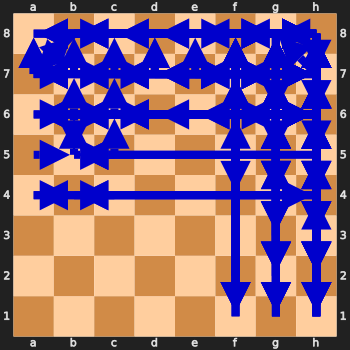

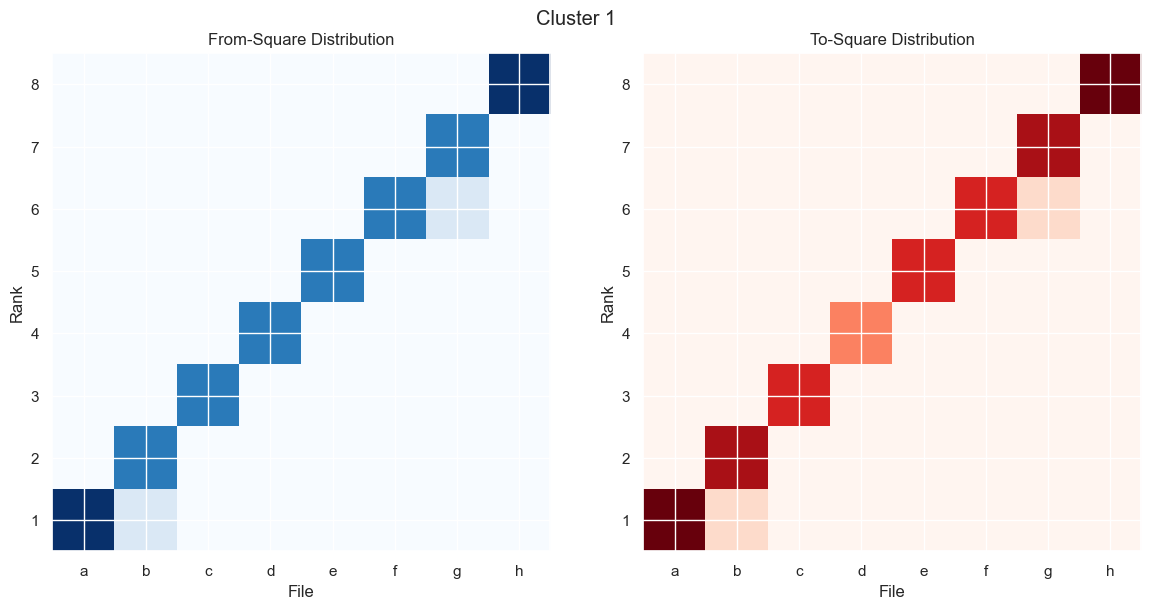

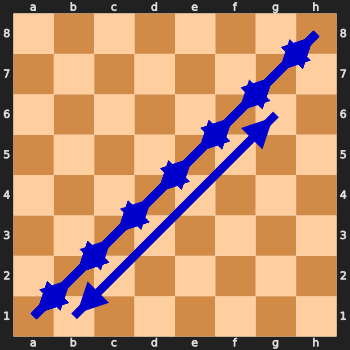

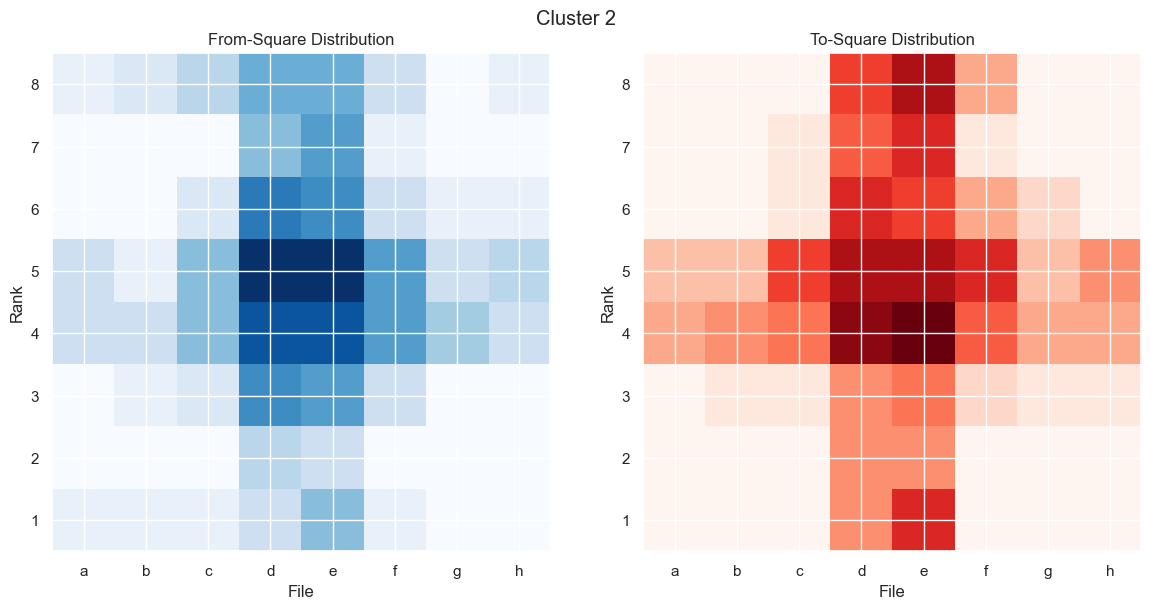

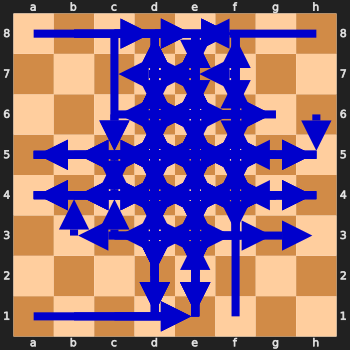

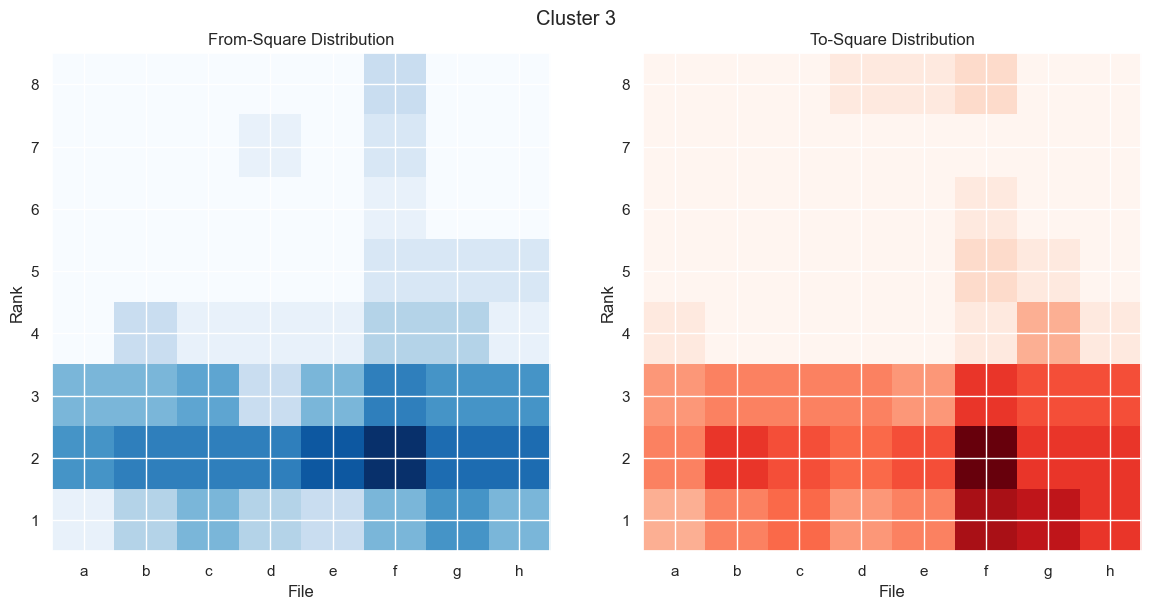

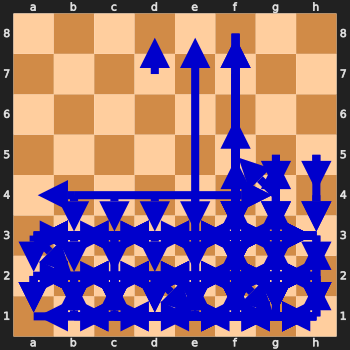

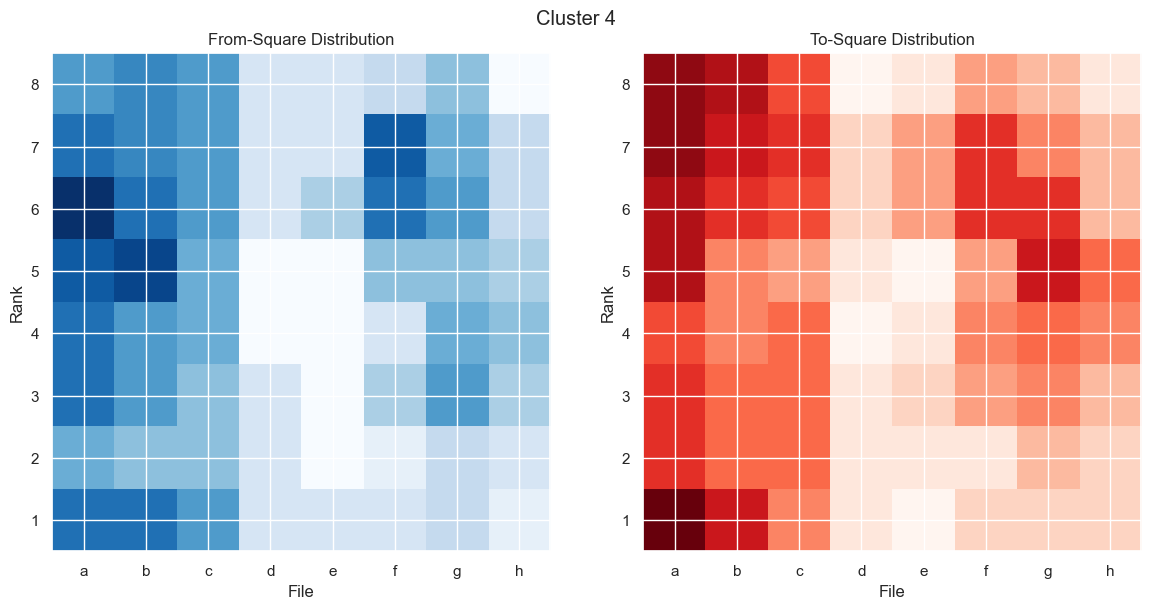

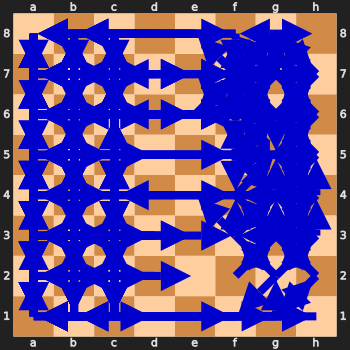

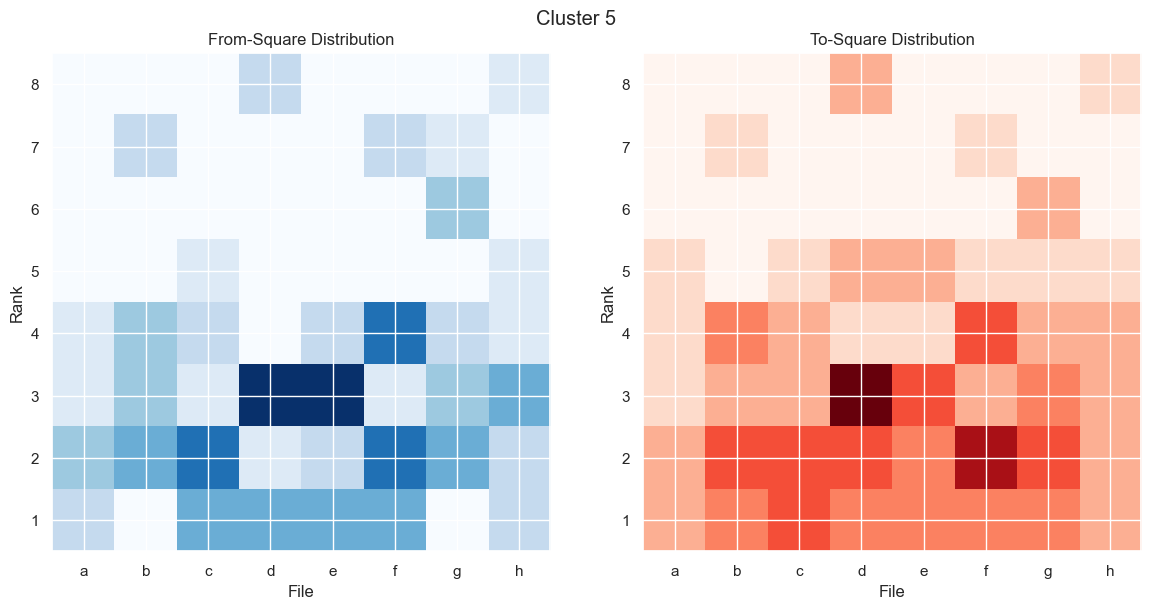

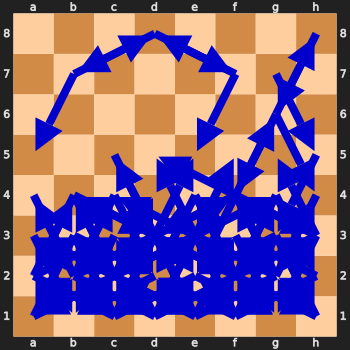

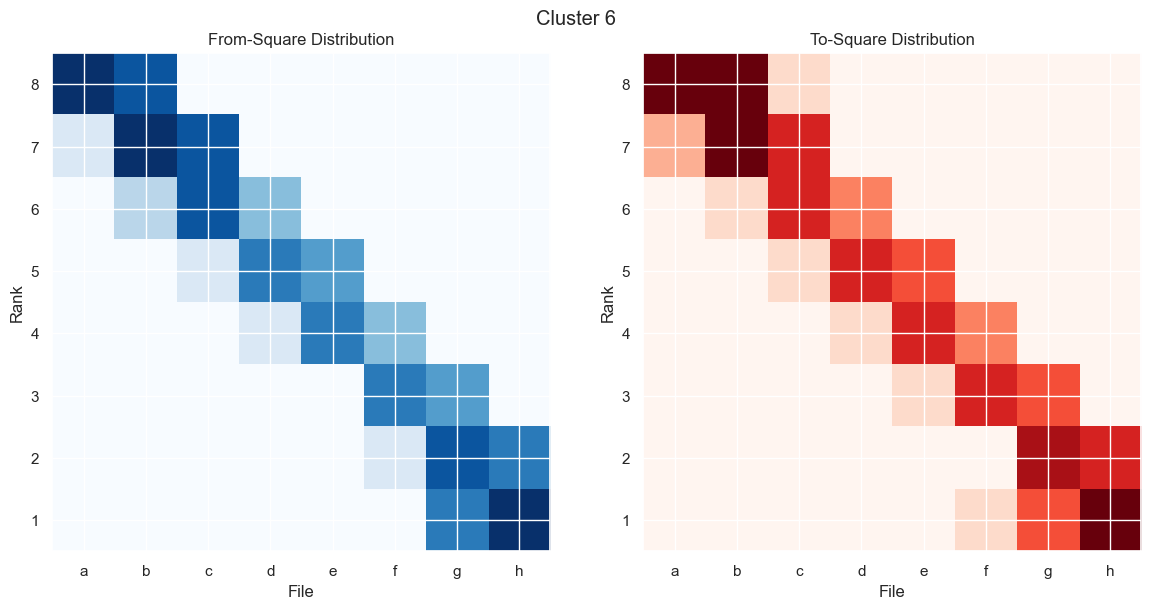

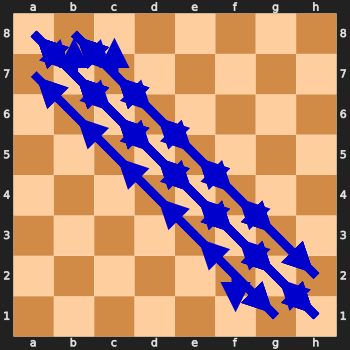

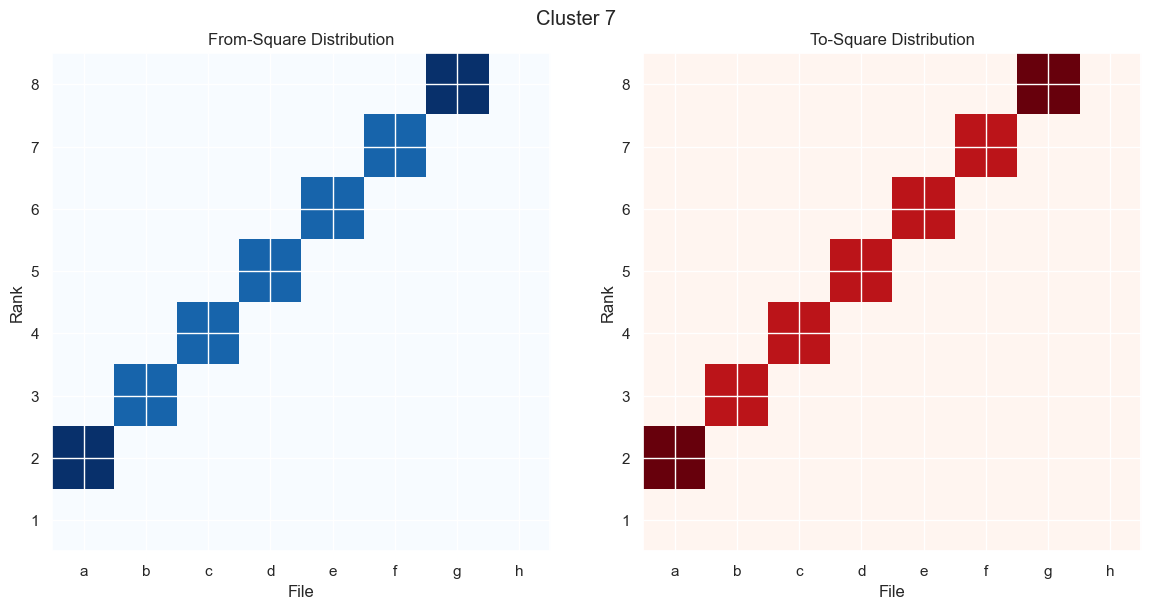

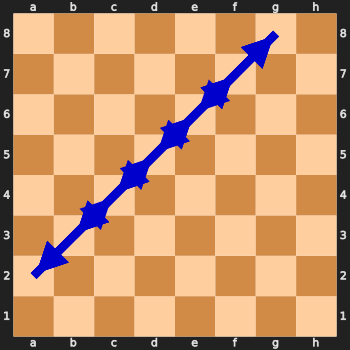

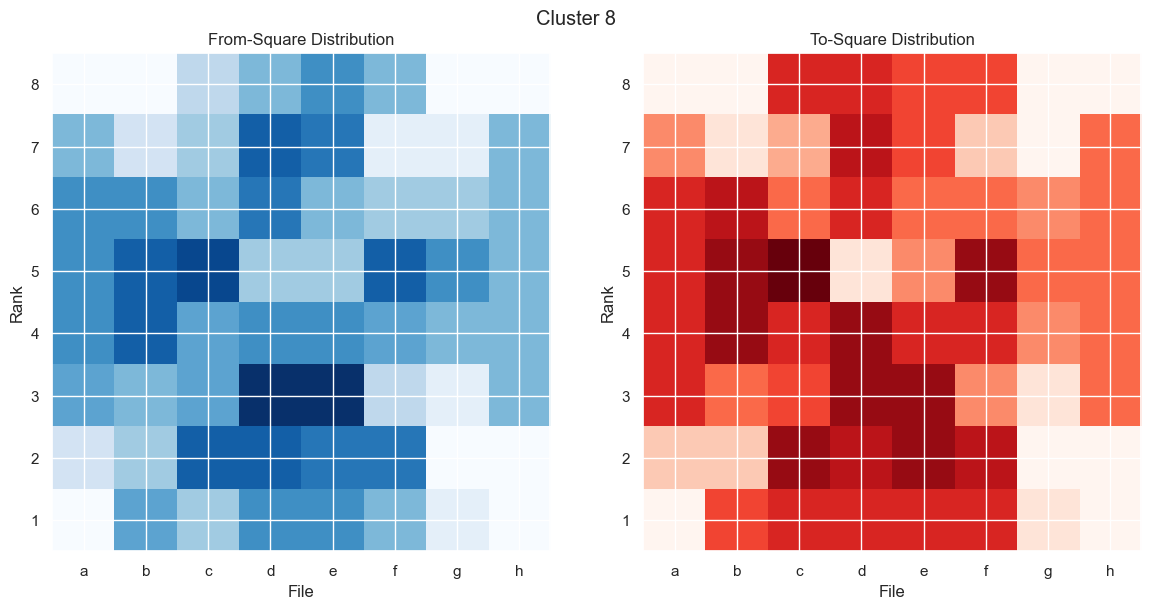

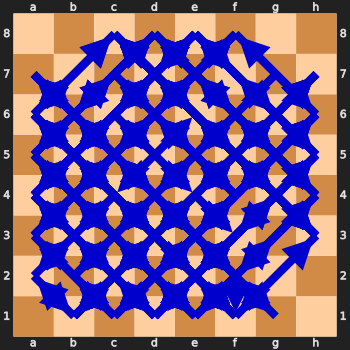

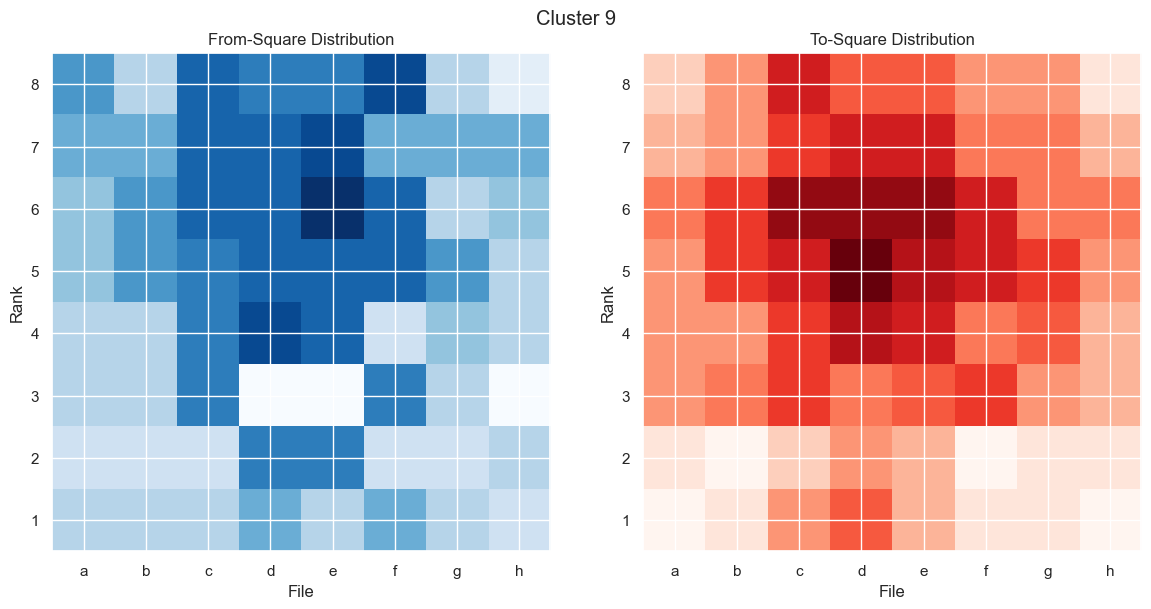

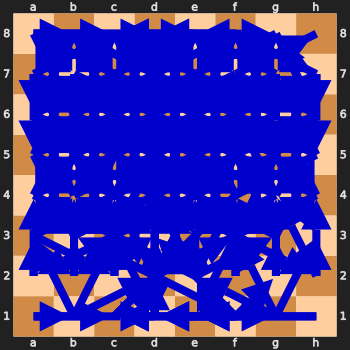

In [ ]:
#plot the clusters using the move plotter
for i in range(best_n_clusters):
    clusterMoves = dictionary[clusters == i]
    movePlotter = MovePlotter(title=f'Cluster {i}')
    for move in clusterMoves:
        movePlotter.addMove(move)
    movePlotter.plot()

Cophenetic correlation coefficient: 0.4823


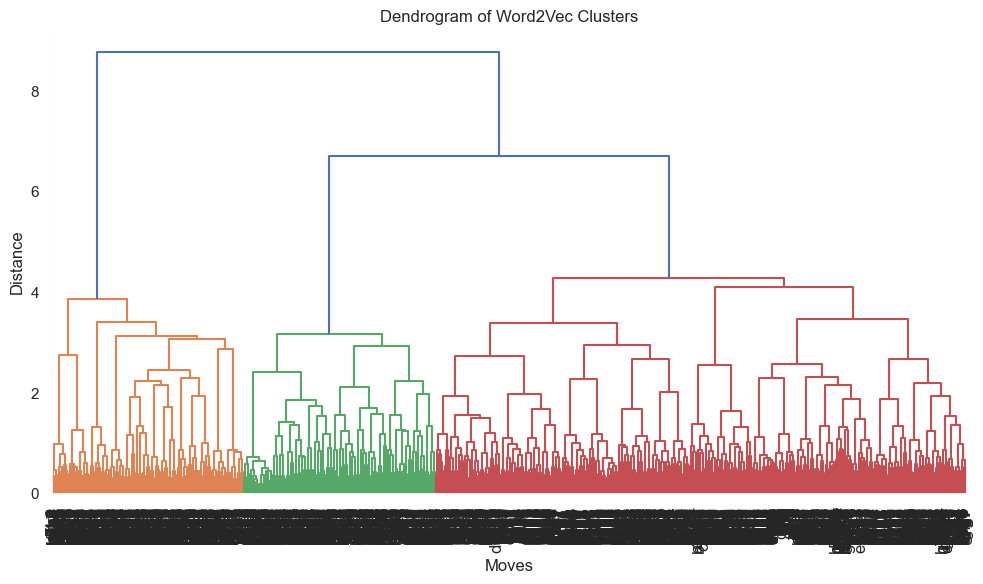

In [ ]:
# Dendograms based on cosine similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import cophenet

# Compute the cosine distance matrix
cosine_distance_matrix = pairwise_distances(wordVectors, metric='cosine')
# Compute the linkage matrix
linkage_matrix = linkage(squareform(cosine_distance_matrix), method='ward')
# Compute the cophenetic correlation coefficient
coph_corr, _ = cophenet(linkage_matrix, squareform(cosine_distance_matrix))
print(f"Cophenetic correlation coefficient: {coph_corr:.4f}")

# Plot the dendrogram
plt.figure(figsize=(10, 6))
plt.title('Dendrogram of Word2Vec Clusters')
dendrogram(linkage_matrix, labels=dictionary, leaf_rotation=90, leaf_font_size=12)
plt.xlabel('Moves')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

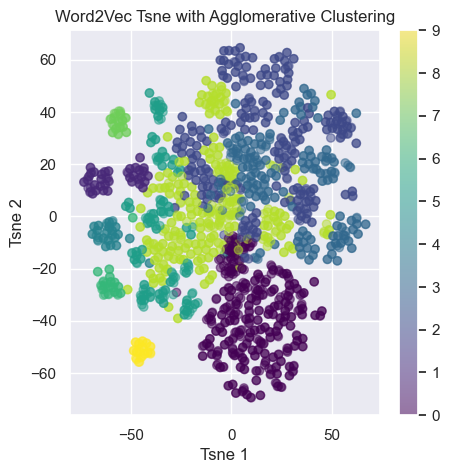

In [39]:
#Hieriarchical clustering with DBSCAN
from sklearn.cluster import AgglomerativeClustering
# Perform hierarchical clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
agglo.fit(wordVectors)
clusters = agglo.labels_

#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], c=clusters, alpha=0.5, cmap='viridis')
plt.title('Word2Vec Tsne with Agglomerative Clustering')
plt.xlabel('Tsne 1')
plt.ylabel('Tsne 2')
plt.colorbar()
plt.show()



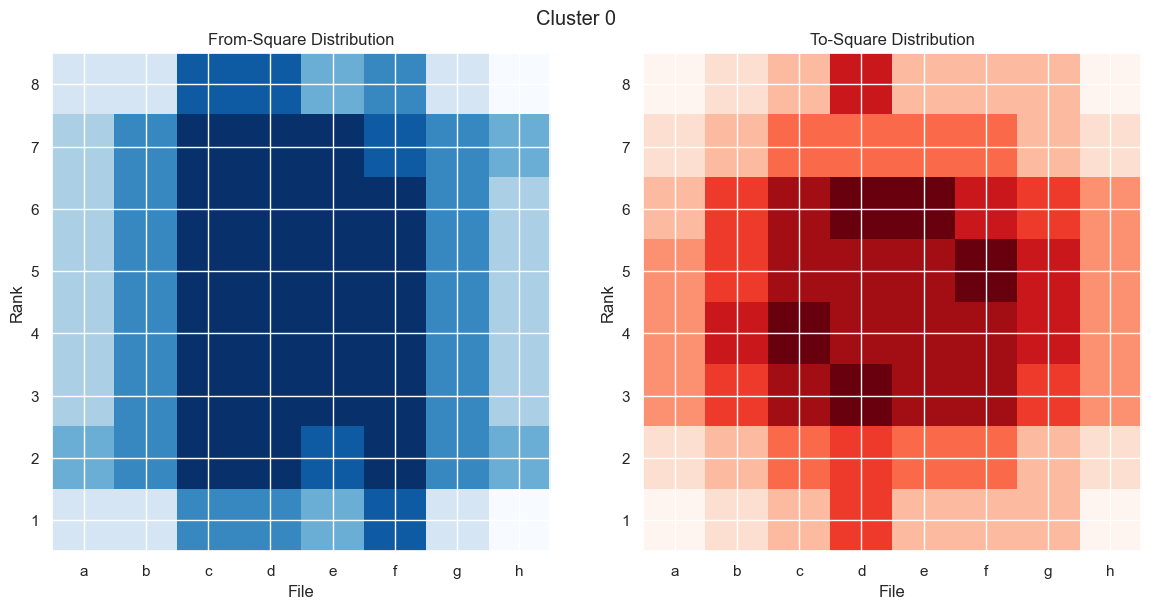

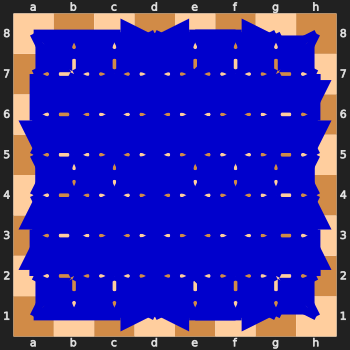

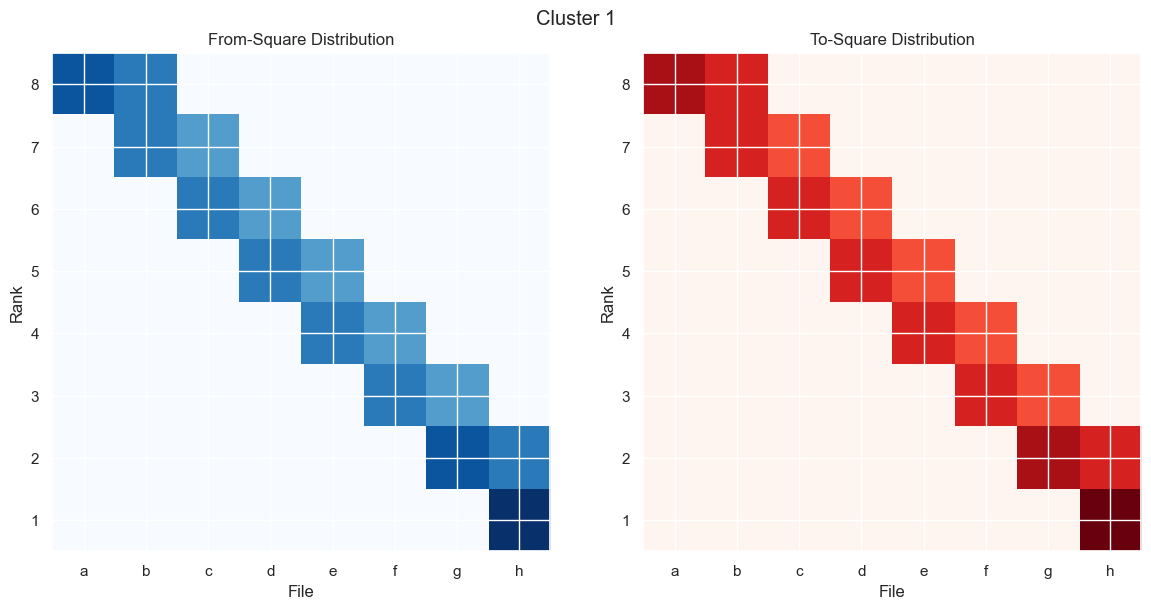

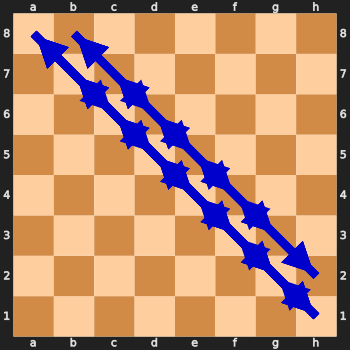

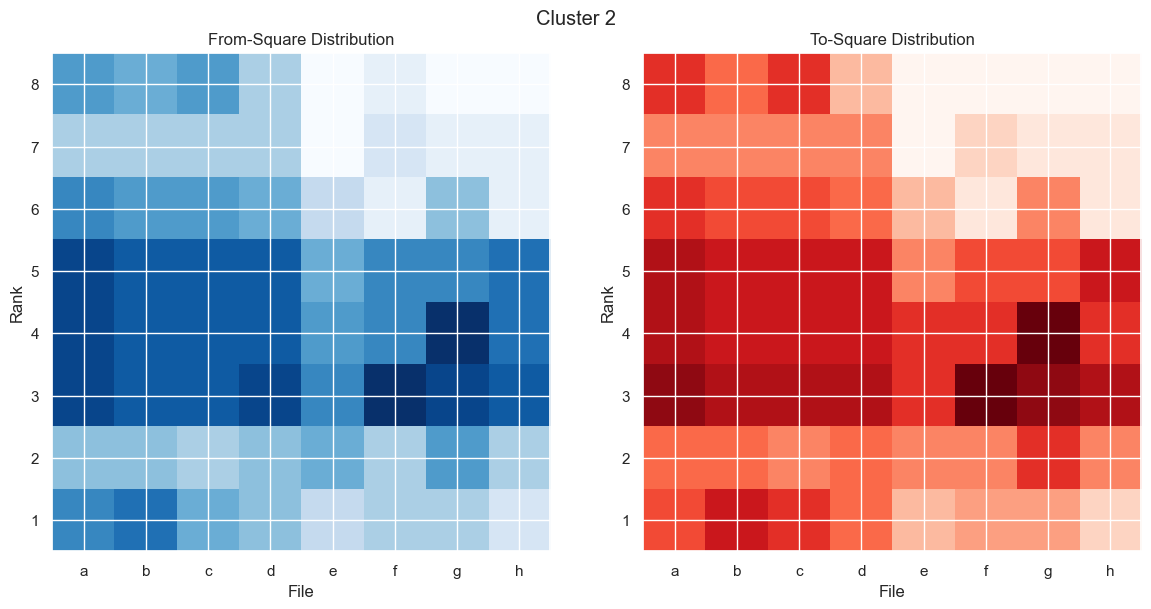

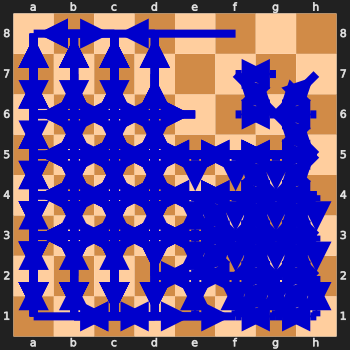

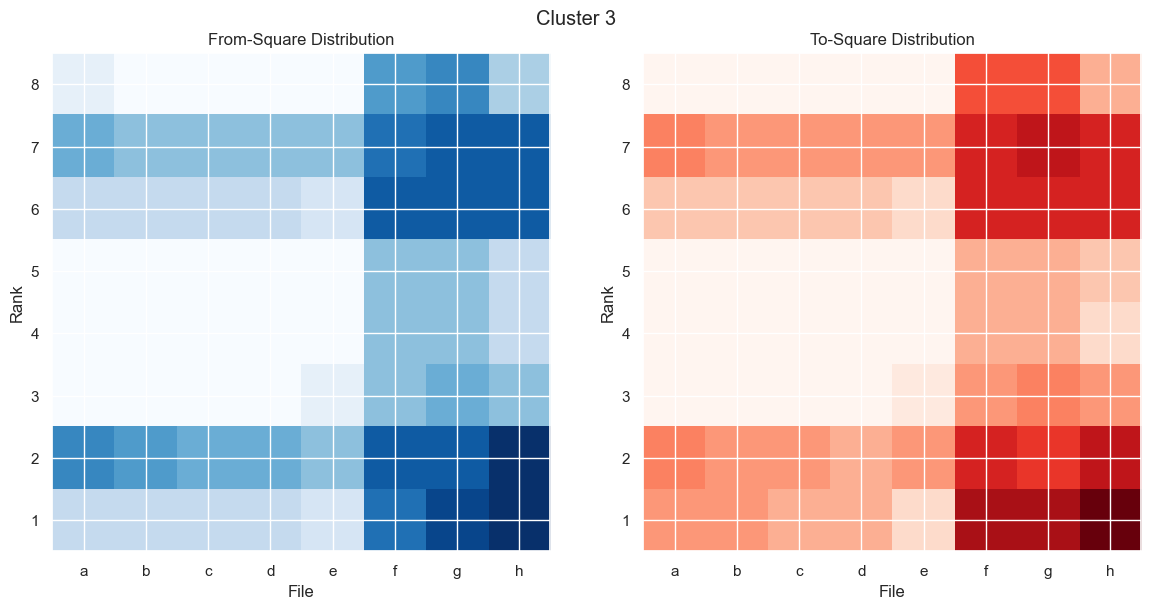

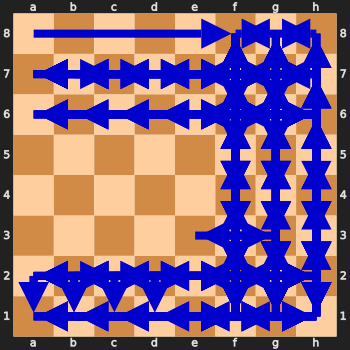

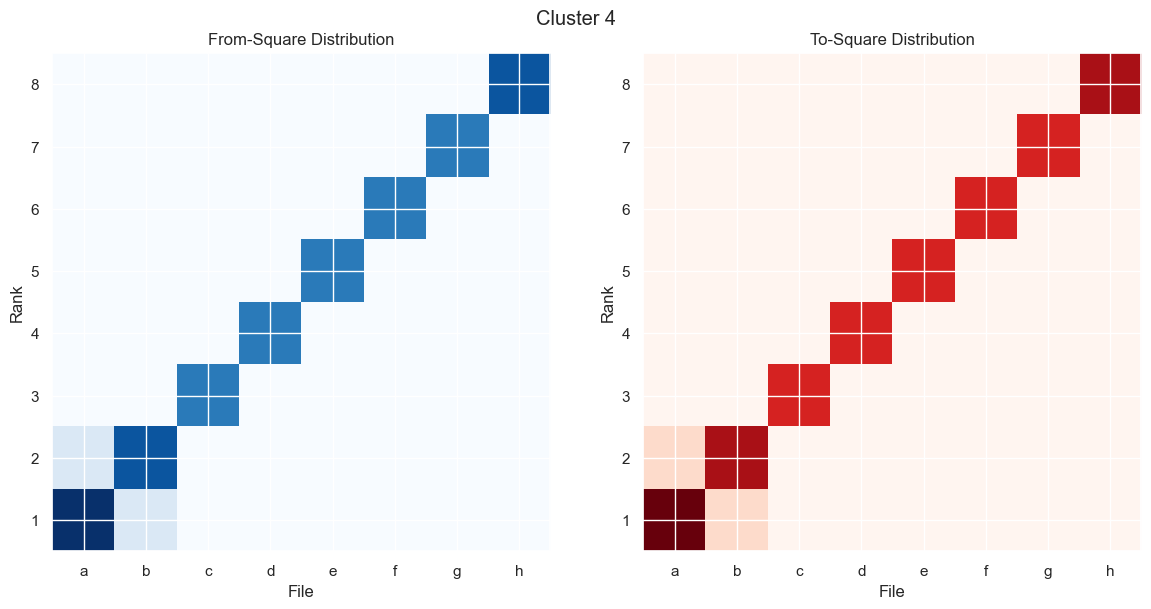

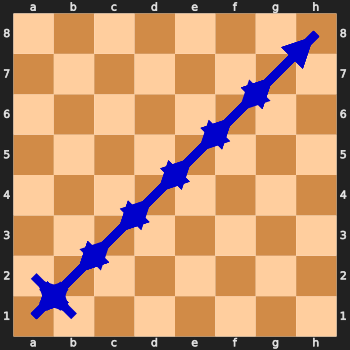

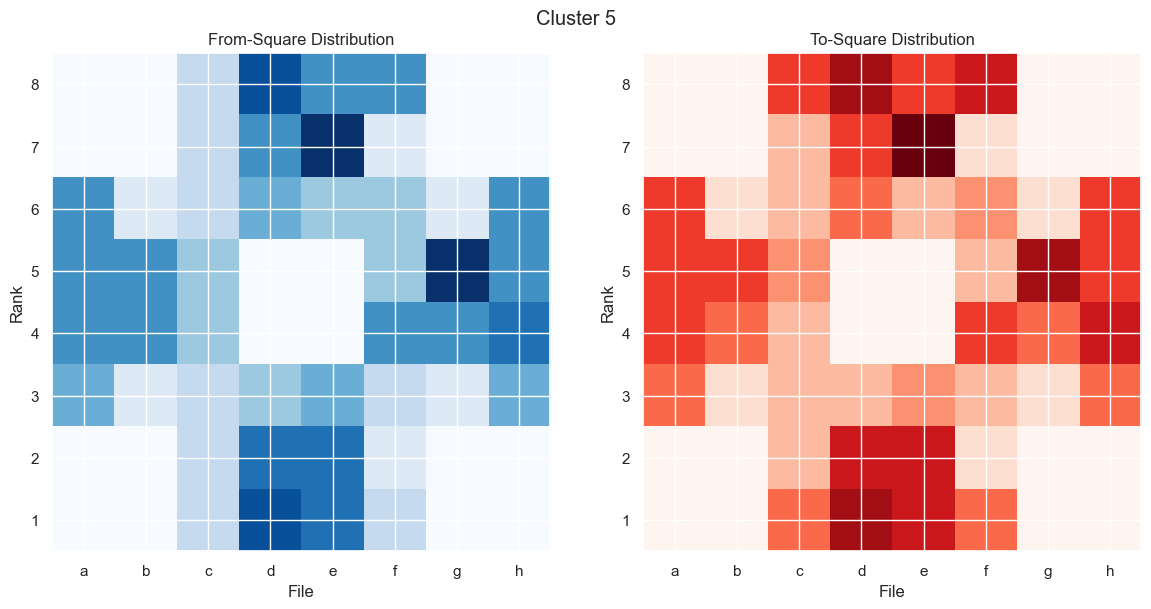

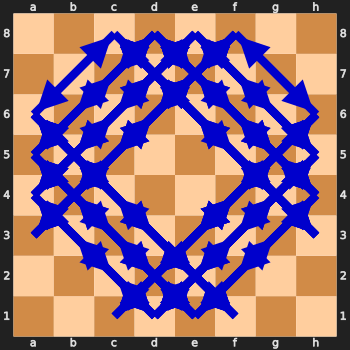

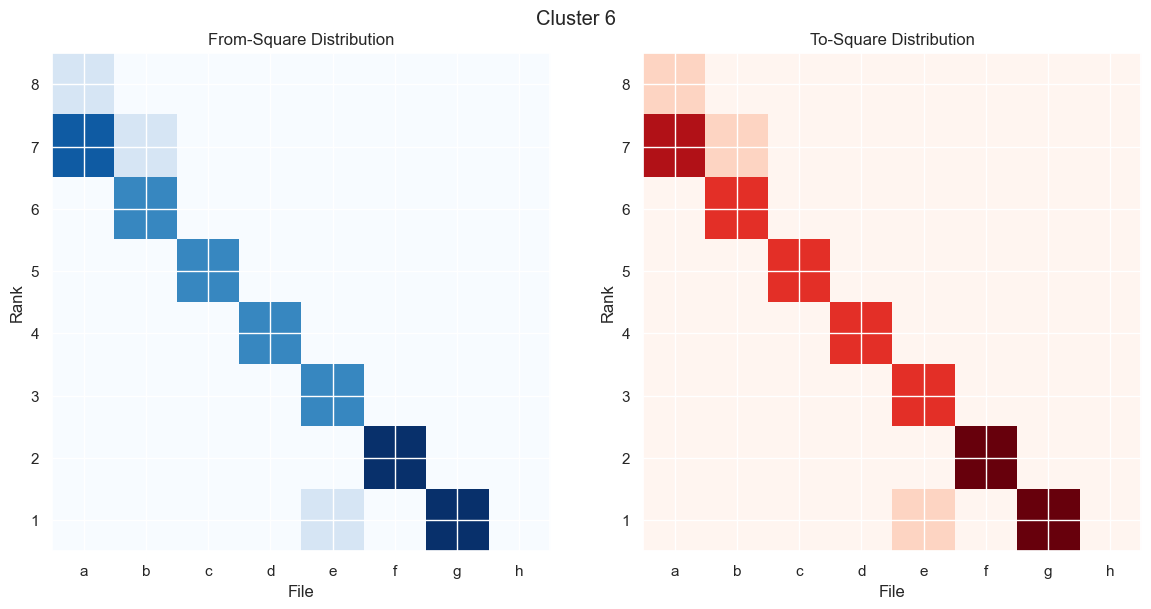

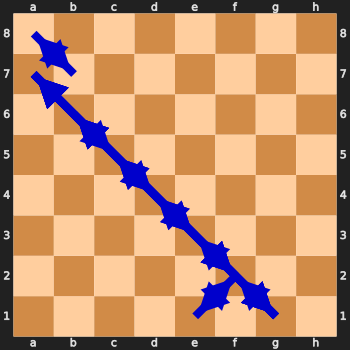

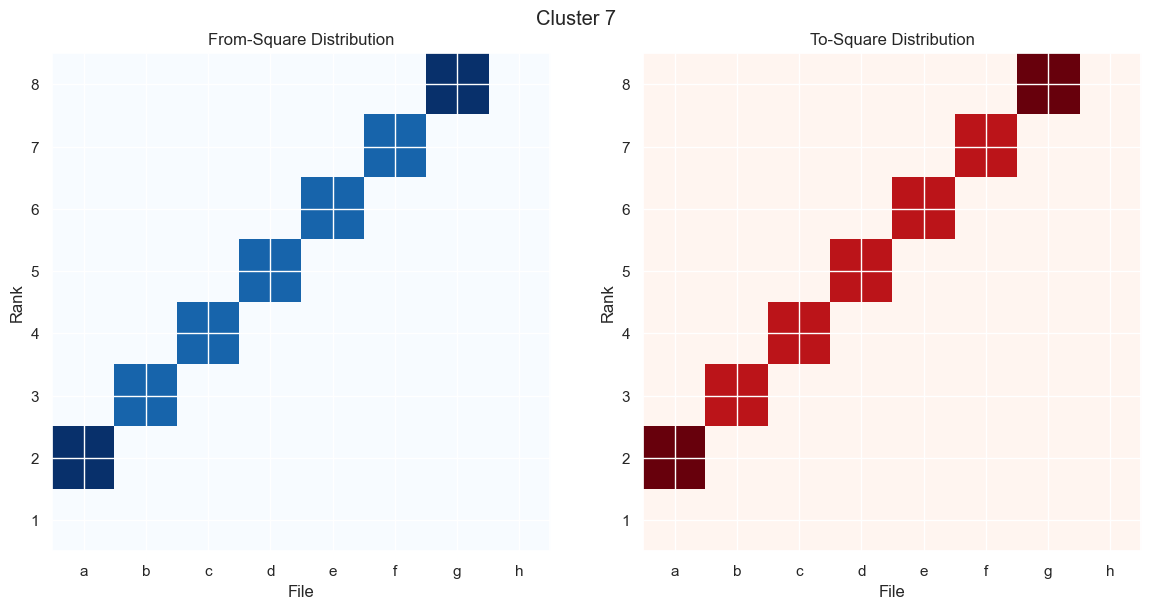

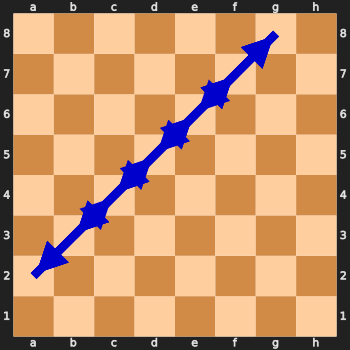

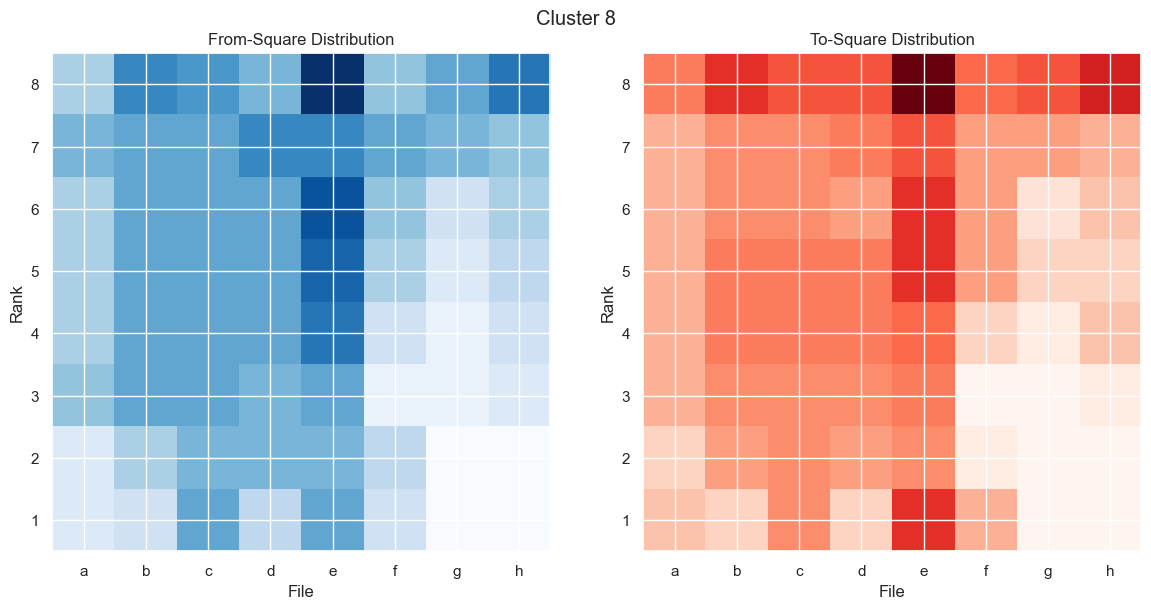

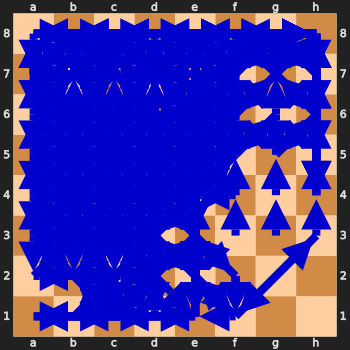

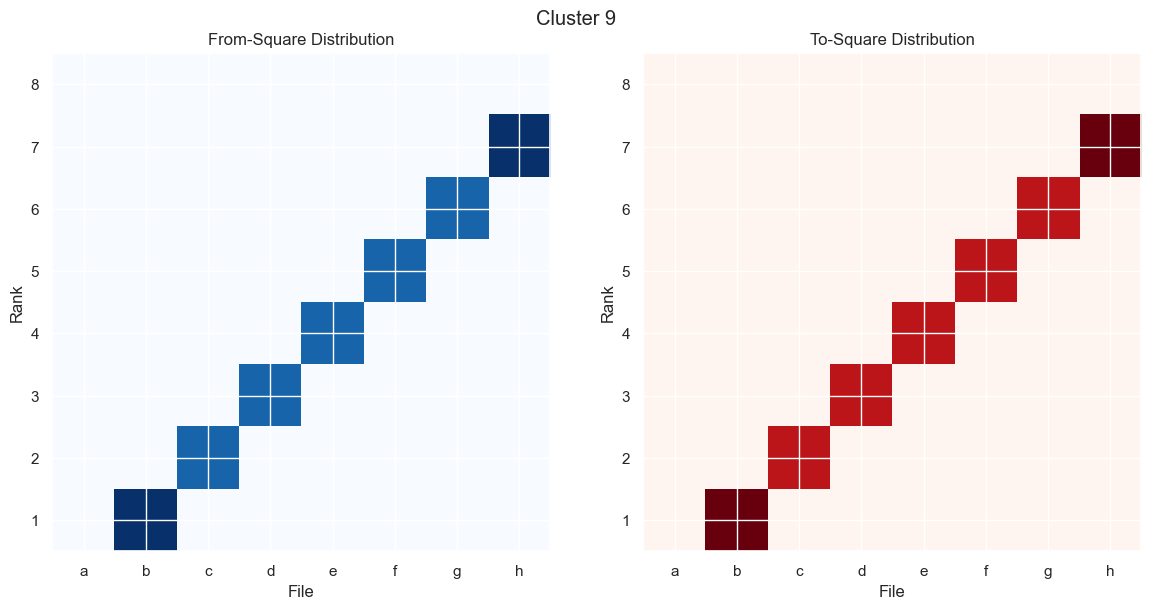

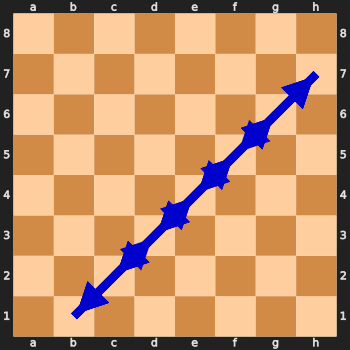

In [ ]:
# Plot the clusters using the move plotter
for i in range(best_n_clusters):
    clusterMoves = dictionary[clusters == i]
    movePlotter = MovePlotter(title=f'Cluster {i}')
    for move in clusterMoves:
        movePlotter.addMove(move)
    movePlotter.plot()